In [26]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset

In [28]:
# Read the data
df = pd.read_csv("../Data PCA/cleaned_augmented_2.csv")

X = df.iloc[:,:-1]
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
X = pd.DataFrame(X_sc, columns=X.columns)



y = df.iloc[:,-1]

class_1 = int(len(df[df['Diabetes_binary'] == 1]))

# List of components to iterate over
components_list = [3, 4, 5, 6, 7, 8, 9, 10]

# Create a folder to store results CSV files if it doesn't exist
if not os.path.exists('Results'):
    os.makedirs('Results')
X

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  0.325581     1.0     0.0   
1          0.0       0.0        0.0  0.151163     1.0     0.0   
2          1.0       1.0        1.0  0.186047     0.0     0.0   
3          1.0       0.0        1.0  0.174419     0.0     0.0   
4          1.0       1.0        1.0  0.139535     0.0     0.0   
...        ...       ...        ...       ...     ...     ...   
253675     1.0       1.0        1.0  0.383721     0.0     0.0   
253676     1.0       1.0        1.0  0.069767     0.0     0.0   
253677     0.0       0.0        1.0  0.186047     0.0     0.0   
253678     1.0       0.0        1.0  0.127907     0.0     0.0   
253679     1.0       1.0        1.0  0.151163     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                        0.0           0.0     1.0      0.0  ...   
3                        0.0           1.0     1.0      1.0  ...   
4                        0.0           1.0     1.0      1.0  ...   
...                      ...           ...     ...      ...  ...   
253675                   0.0           0.0     1.0      1.0  ...   
253676                   0.0           0.0     0.0      0.0  ...   
253677                   0.0           1.0     1.0      0.0  ...   
253678                   0.0           0.0     1.0      1.0  ...   
253679                   1.0           1.0     1.0      0.0  ...   

        number_emergency  number_inpatient  number_diagnoses  \
0               0.015625          0.000000          0.533333   
1               0.015625          0.238095          0.200000   
2               0.000000          0.000000          0.200000   
3               0.000000          0.047619          0.533333   
4               0.000000          0.000000          0.200000   
...                  ...               ...               ...   
253675          0.000000          0.000000          0.266667   
253676          0.000000          0.000000          0.400000   
253677          0.015625          0.095238          0.266667   
253678          0.000000          0.047619          0.533333   
253679          0.000000          0.000000          0.533333   

        race_AfricanAmerican  race_Asian  race_Caucasian  race_Hispanic  \
0                        0.0         0.0             1.0            0.0   
1                        0.0         0.0             1.0            0.0   
2                        0.0         0.0             1.0            0.0   
3                        0.0         0.0             1.0            0.0   
4                        0.0         0.0             0.0            0.0   
...                      ...         ...             ...            ...   
253675                   0.0         0.0             1.0            0.0   
253676                   1.0         0.0             0.0            0.0   
253677                   0.0         0.0             1.0            0.0   
253678                   0.0         0.0             1.0            0.0   
253679                   1.0         0.0             0.0            0.0   

        race_Other  readmitted_<30  readmitted_>30  
0              0.0             0.0             1.0  
1              0.0             0.0             0.0  
2              0.0             0.0             0.0  
3              0.0             0.0             0.0  
4              1.0             0.0             0.0  
...            ...             ...             ...  
253675         0.0             0.0             0.0  
253676         0.0             0.0             0.0  
253677         0.0             0.0             1.0  
253678         0.0             0.0             0.0  
253679         0.0             0.0             0.0  

[253680 rows x 42 columns]

In [29]:
# Define the RBF neural network
class RBFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RBFNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.centers = nn.Parameter(torch.rand(hidden_dim, input_dim))
        self.beta = nn.Parameter(torch.rand(hidden_dim))
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.drop = nn.Dropout(p=0.2)
        self.linear3 = nn.Linear(hidden_dim, output_dim)

    def radial_basis_function(self, x):
        return torch.exp(-self.beta * (x.unsqueeze(1) - self.centers).pow(2).sum(2))

    def forward(self, x):
        rbf_out = self.radial_basis_function(x)
        h1 = self.linear(rbf_out)
        h2 = self.linear2(self.drop(h1))
        output = self.linear3(h2)
        return output, rbf_out

{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6829, Training Accuracy: 0.6180
Validation Loss: 0.6455, Validation Accuracy: 0.6233



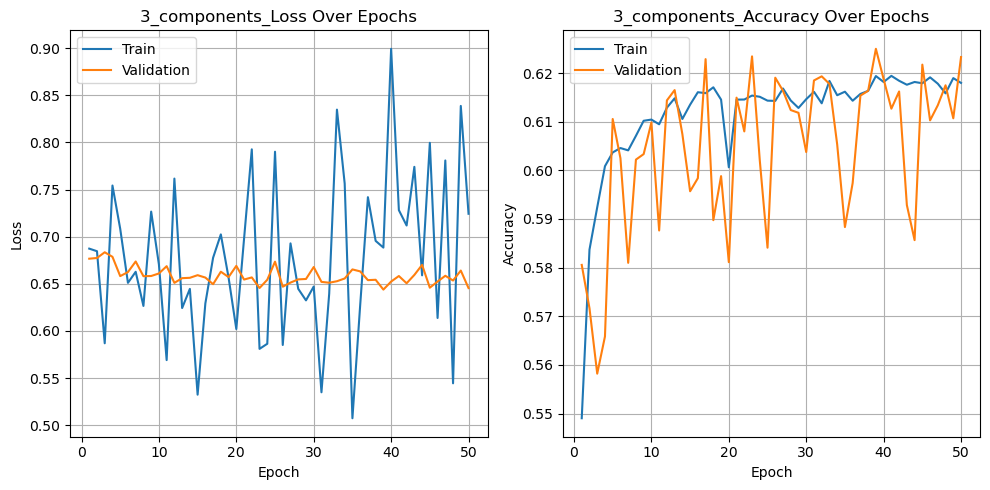

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6213578500707213, 'precision': 0.6109100310237849, 'recall': 0.6684582743988685, 'F1_score': 0.6383898419559638, 'n_components': 3, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6873, Training Accuracy: 0.5109
Validation Loss: 0.6938, Validation Accuracy: 0.5168



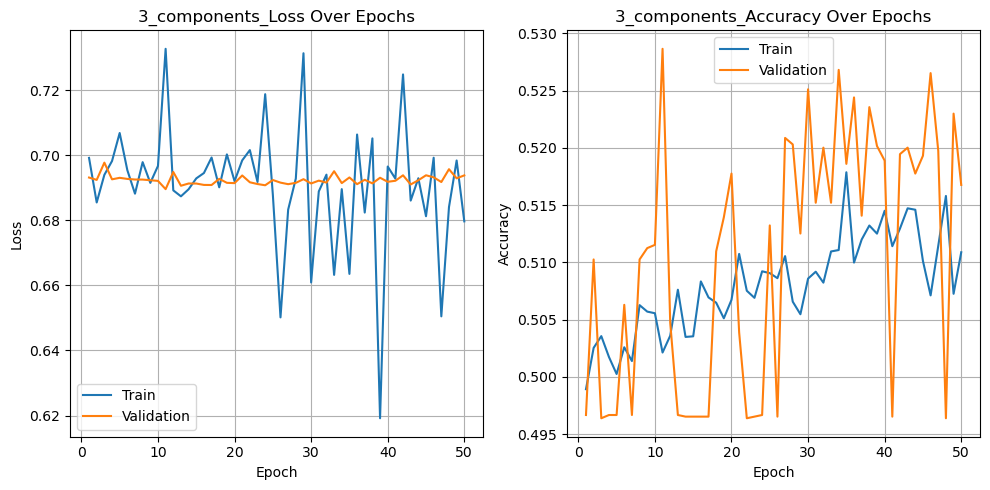

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.5142857142857142, 'precision': 0.6346666666666667, 'recall': 0.06732673267326733, 'F1_score': 0.1217391304347826, 'n_components': 3, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6931, Training Accuracy: 0.4986
Validation Loss: 0.7876, Validation Accuracy: 0.5062



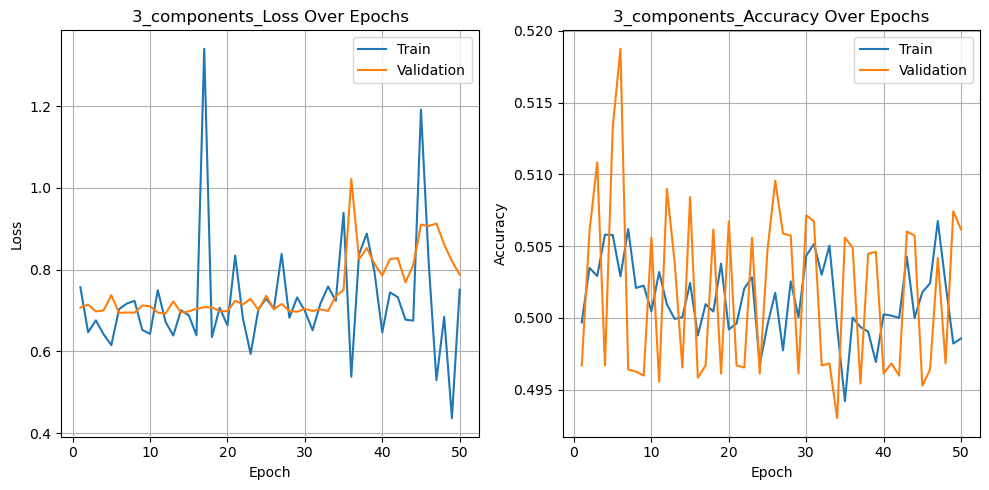

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': 0.504950495049505, 'precision': 0.8070175438596491, 'recall': 0.013012729844413012, 'F1_score': 0.025612472160356343, 'n_components': 3, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 3}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



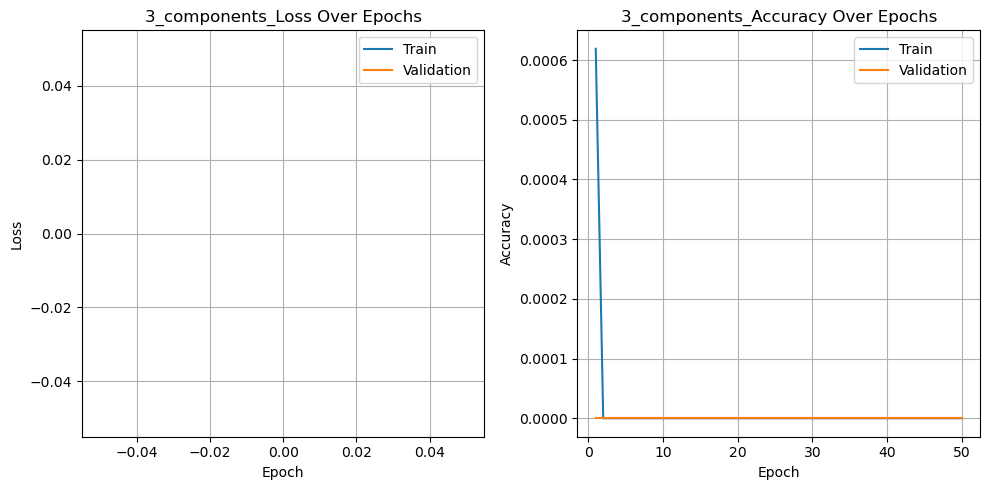

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 3, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 3}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



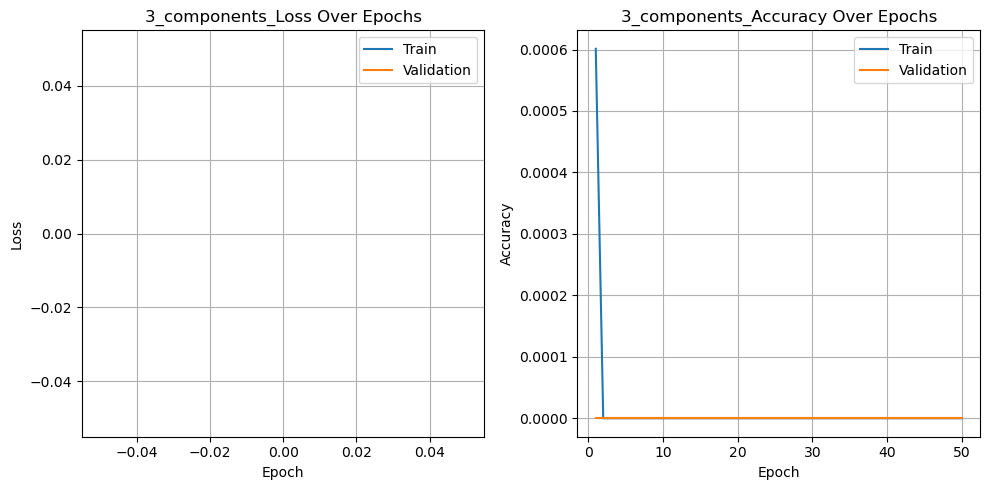

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 3, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6919, Training Accuracy: 0.5021
Validation Loss: 0.6926, Validation Accuracy: 0.5062



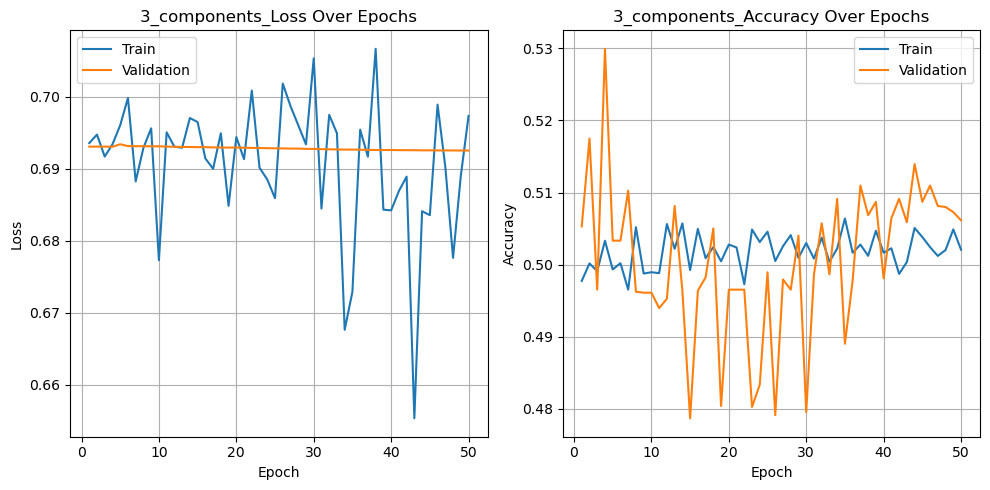

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.49434229137199437, 'precision': 0.4853157121879589, 'recall': 0.186987270155587, 'F1_score': 0.26996120073514396, 'n_components': 3, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6971, Training Accuracy: 0.5069
Validation Loss: 0.6957, Validation Accuracy: 0.4967



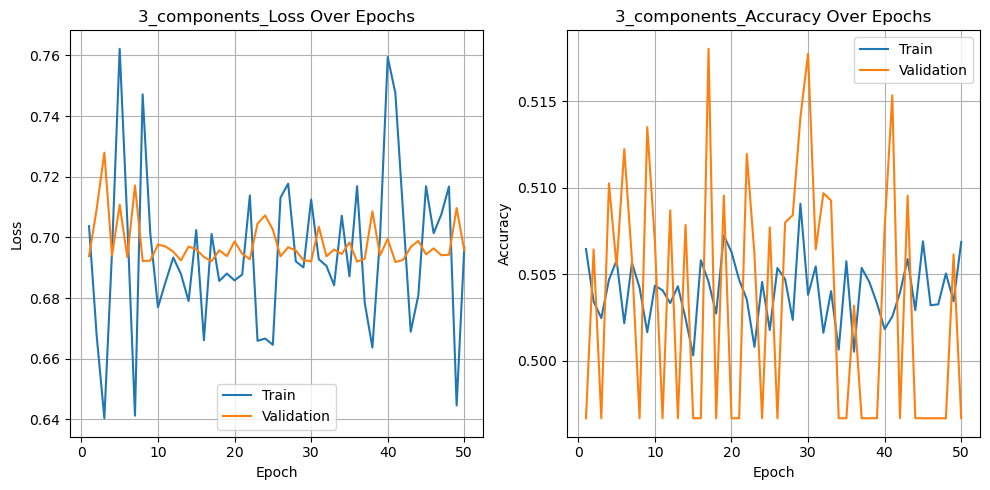

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': 0.5, 'precision': 0.5, 'recall': 1.0, 'F1_score': 0.6666666666666666, 'n_components': 3, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 3}
Epoch 50/50
Training Loss: 0.6907, Training Accuracy: 0.5054
Validation Loss: 0.6921, Validation Accuracy: 0.5054



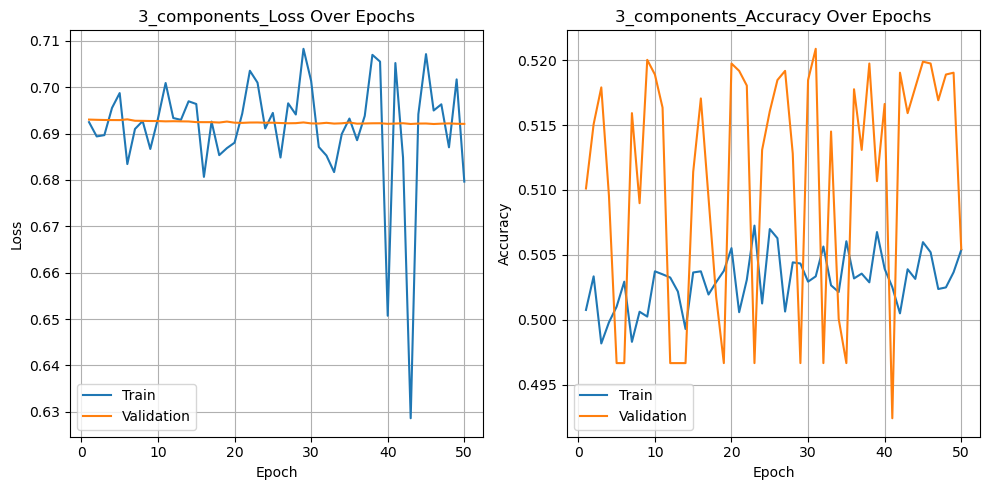

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.4937765205091938, 'precision': 0.4843081312410842, 'recall': 0.19207920792079208, 'F1_score': 0.27506582945108365, 'n_components': 3, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 3}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



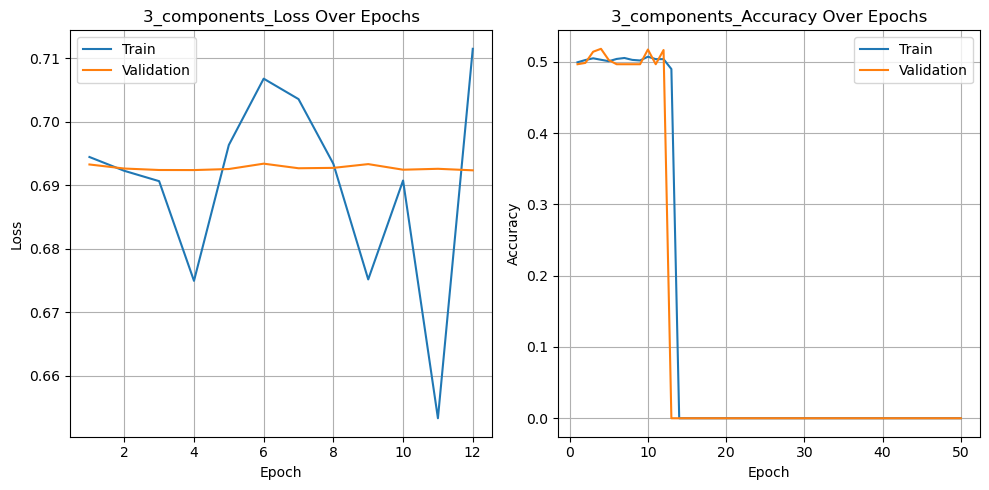

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 3, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 3}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



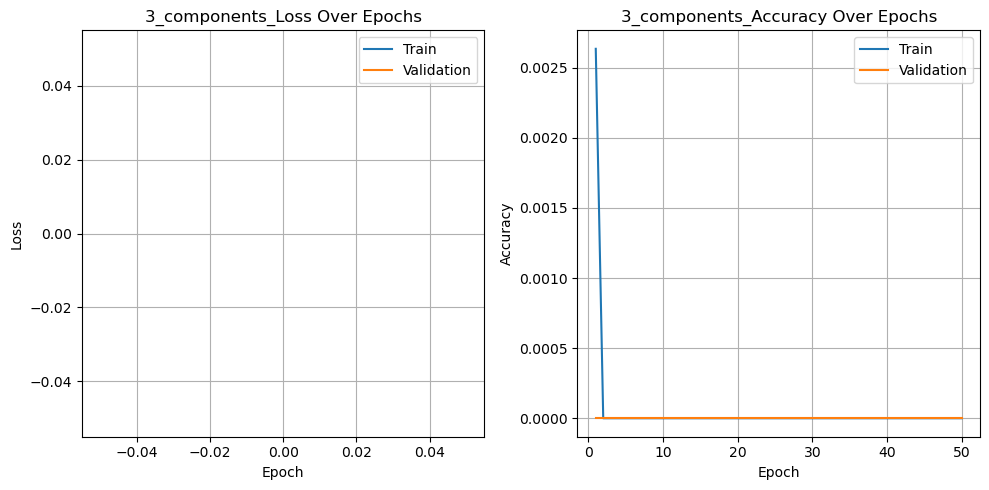

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 3, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 4}
Epoch 50/50
Training Loss: 0.5804, Training Accuracy: 0.6309
Validation Loss: 0.6259, Validation Accuracy: 0.6543



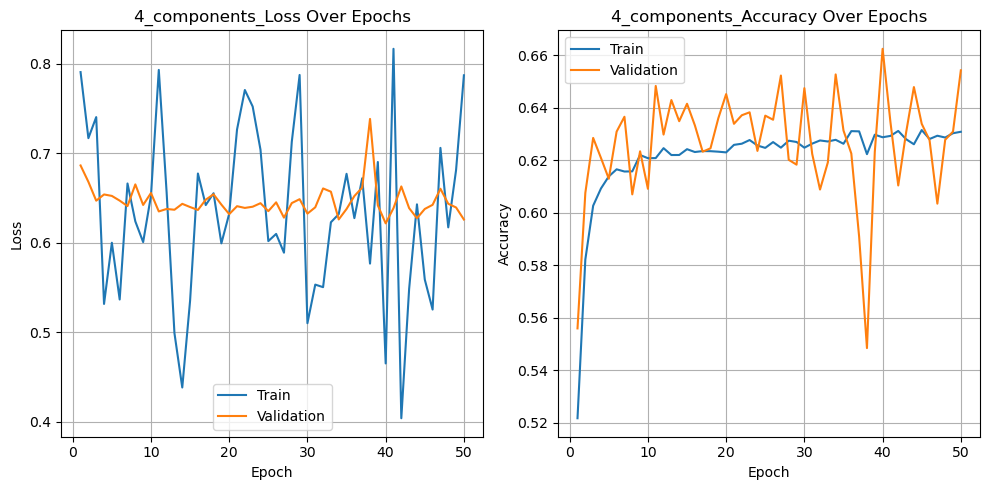

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6414427157001414, 'precision': 0.6043101532992669, 'recall': 0.7829591249280369, 'F1_score': 0.6821316614420063, 'n_components': 4, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 4}
Epoch 50/50
Training Loss: 0.6901, Training Accuracy: 0.5117
Validation Loss: 0.6924, Validation Accuracy: 0.5066



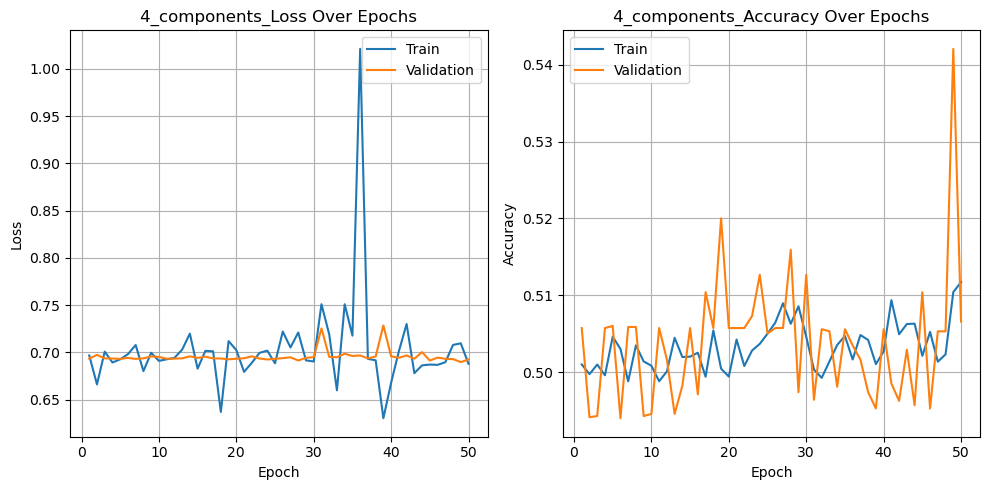

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.5222065063649222, 'precision': 0.7051282051282052, 'recall': 0.047495682210708115, 'F1_score': 0.0889967637540453, 'n_components': 4, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



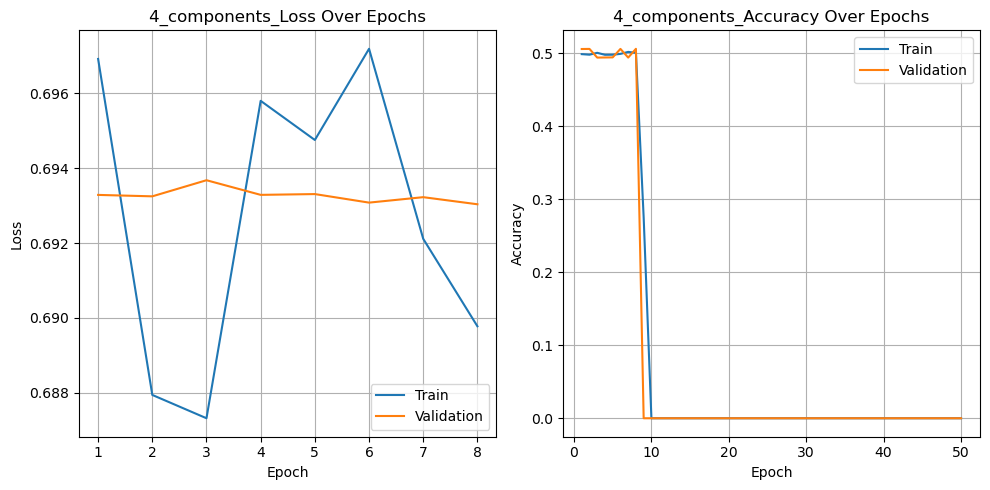

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.01

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



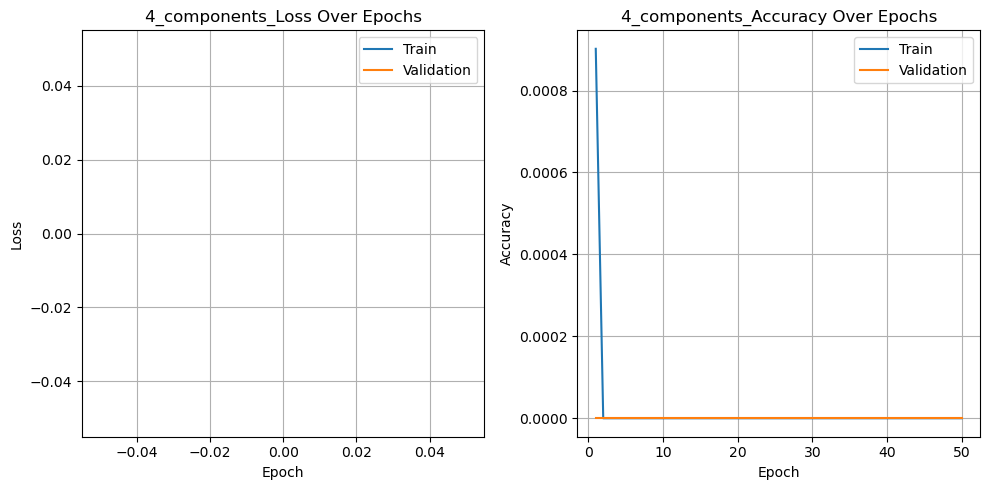

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



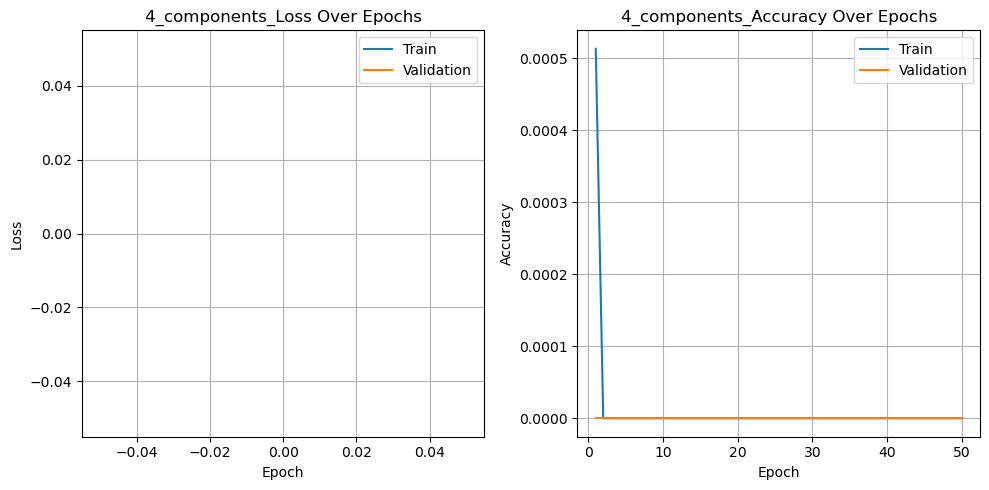

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 4}
Epoch 50/50
Training Loss: 0.6933, Training Accuracy: 0.4987
Validation Loss: 0.6931, Validation Accuracy: 0.5059



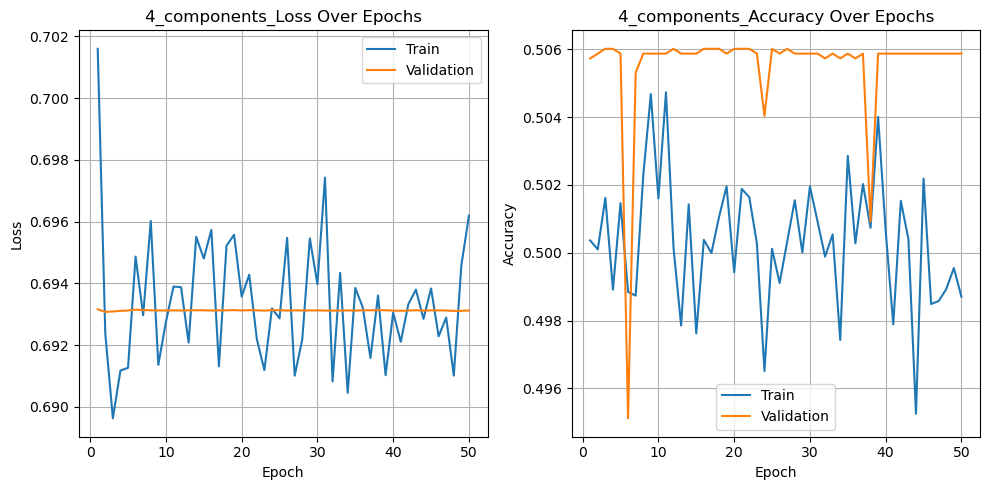

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.4913719943422914, 'precision': 0.4913719943422914, 'recall': 1.0, 'F1_score': 0.6589529590288316, 'n_components': 4, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 4}
Epoch 50/50
Training Loss: 0.6949, Training Accuracy: 0.4995
Validation Loss: 0.6929, Validation Accuracy: 0.5057



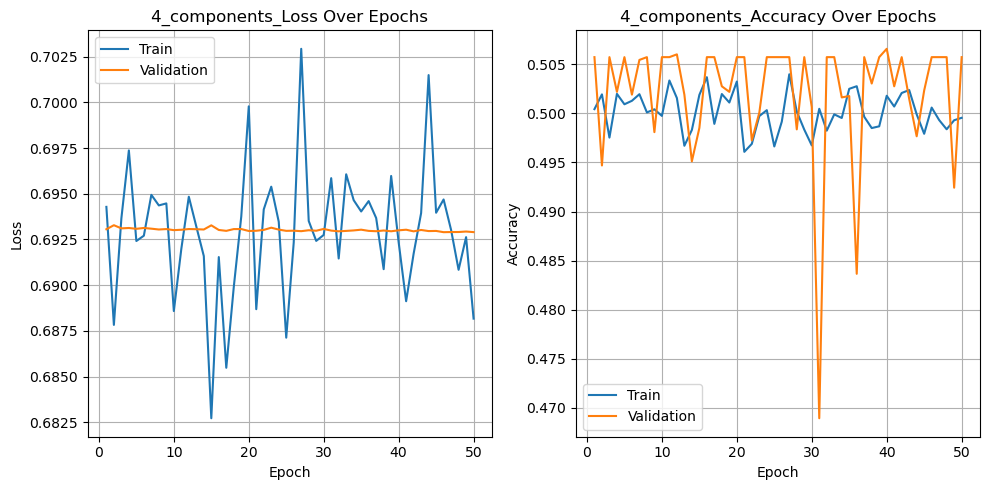

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': 0.4913719943422914, 'precision': 0.4913719943422914, 'recall': 1.0, 'F1_score': 0.6589529590288316, 'n_components': 4, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.01

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



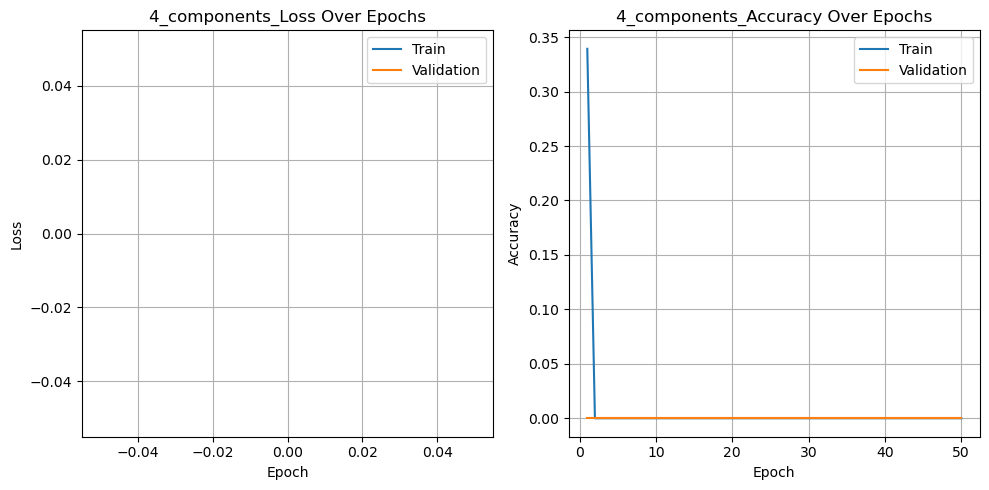

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 4}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 4, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 5}
Epoch 50/50
Training Loss: 0.5308, Training Accuracy: 0.6311
Validation Loss: 0.6408, Validation Accuracy: 0.6312



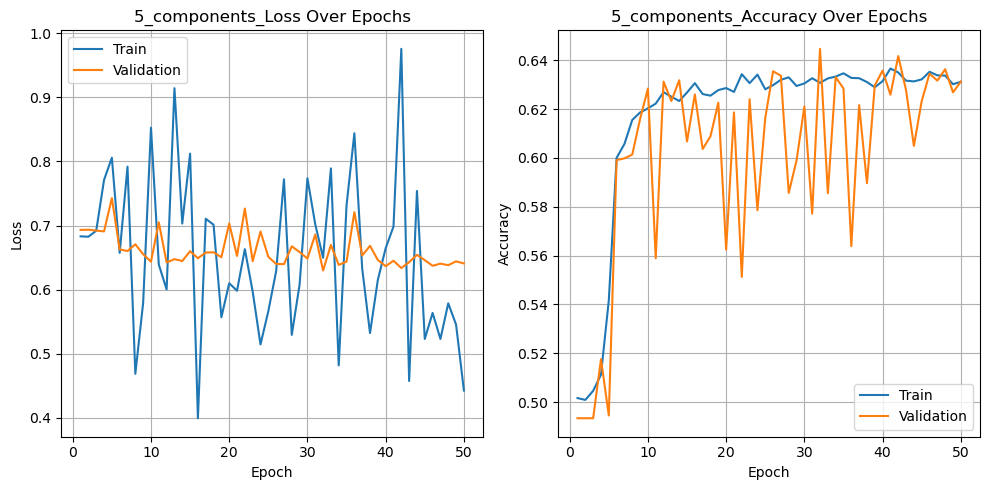

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.649080622347949, 'precision': 0.6411716842961758, 'recall': 0.6712095400340715, 'F1_score': 0.6558468580940491, 'n_components': 5, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 5}
Epoch 50/50
Training Loss: 0.6941, Training Accuracy: 0.5069
Validation Loss: 0.6973, Validation Accuracy: 0.4926



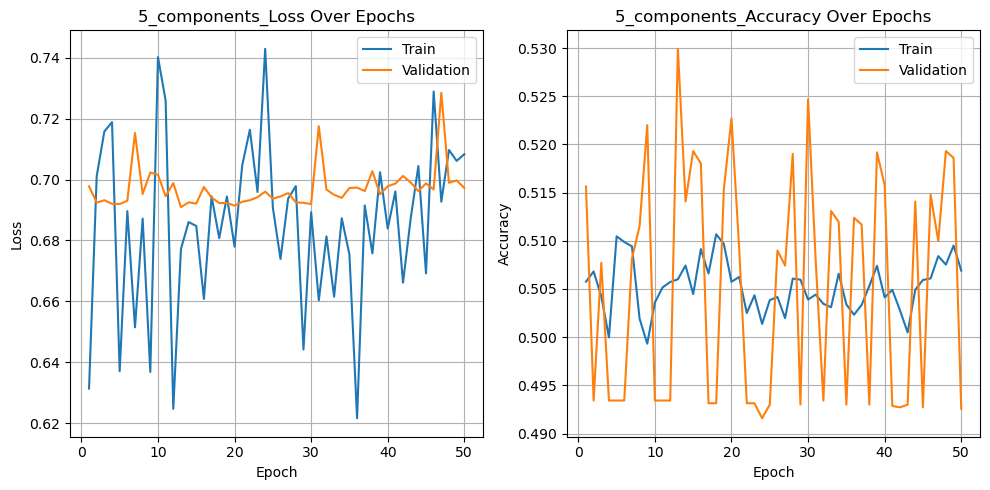

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.49872701555869875, 'precision': 0.49843927355278095, 'recall': 0.9974446337308348, 'F1_score': 0.6647114474929045, 'n_components': 5, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 5}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.01

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 5, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 5}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 5, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 5}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



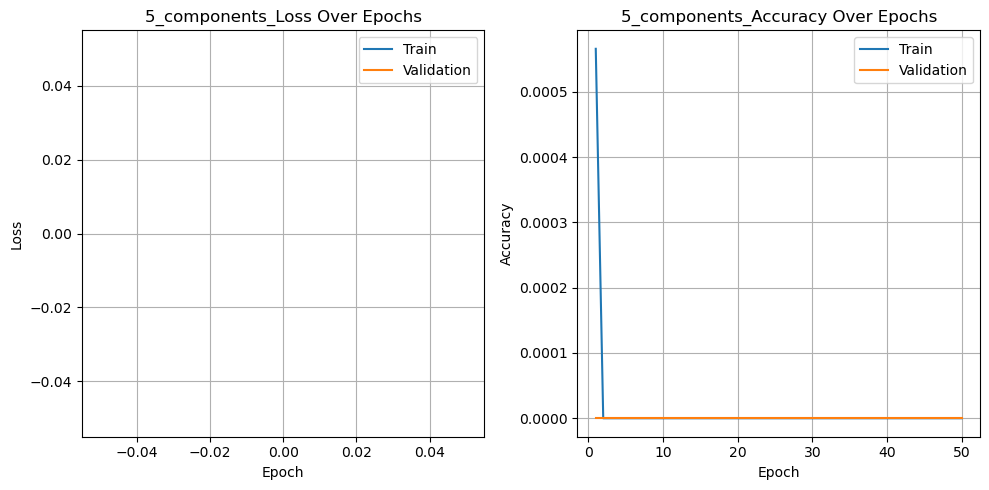

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 5, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 5}
Epoch 50/50
Training Loss: 0.6933, Training Accuracy: 0.5001
Validation Loss: 0.6932, Validation Accuracy: 0.4934



{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.4981612446958982, 'precision': 0.4981612446958982, 'recall': 1.0, 'F1_score': 0.6650302114803625, 'n_components': 5, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 5}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.005

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 5, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 5}
Epoch 50/50
Training Loss: 0.6942, Training Accuracy: 0.5025
Validation Loss: 0.6931, Validation Accuracy: 0.4934



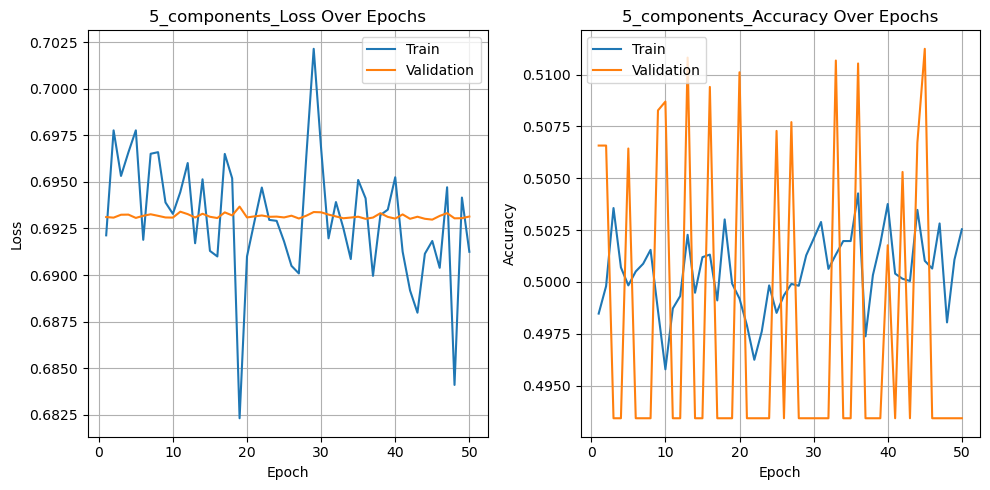

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.4981612446958982, 'precision': 0.4981612446958982, 'recall': 1.0, 'F1_score': 0.6650302114803625, 'n_components': 5, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 5}
Epoch 50/50
Training Loss: 0.6938, Training Accuracy: 0.4994
Validation Loss: 0.6934, Validation Accuracy: 0.4934



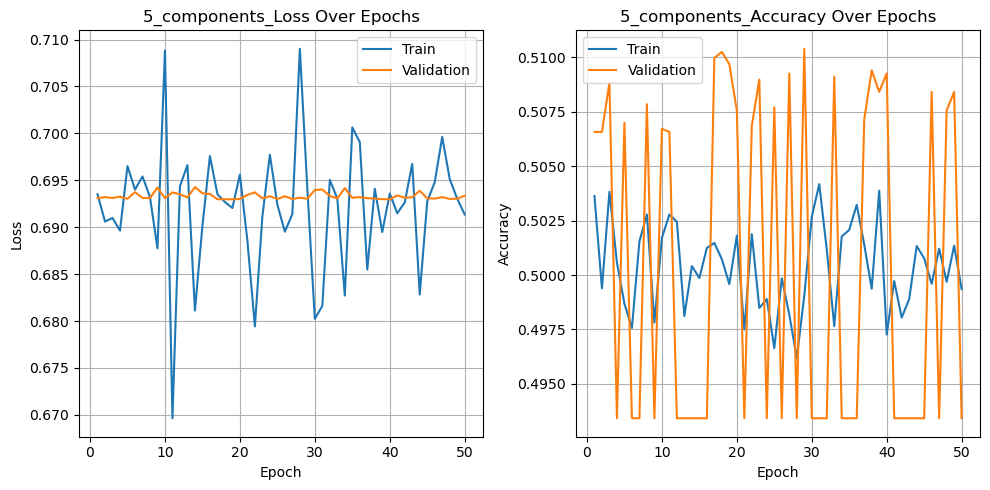

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': 0.4981612446958982, 'precision': 0.4981612446958982, 'recall': 1.0, 'F1_score': 0.6650302114803625, 'n_components': 5, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 5}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



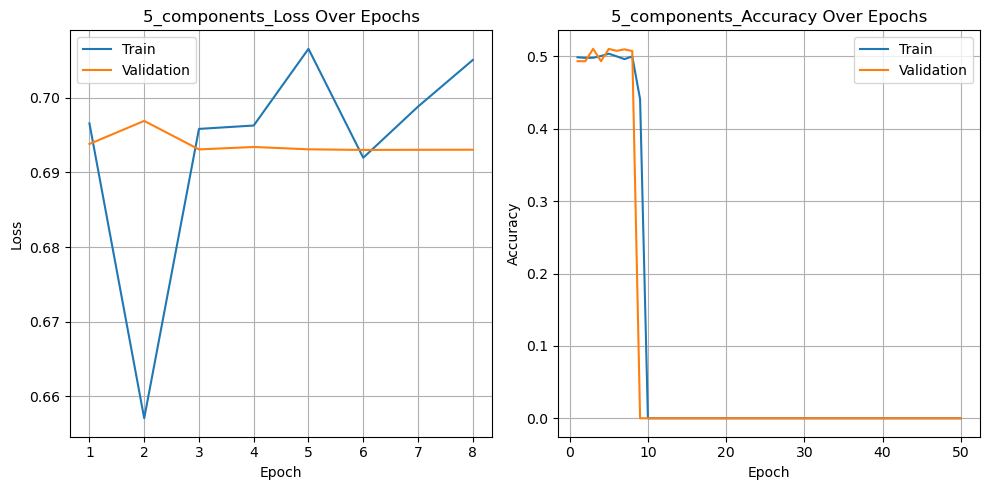

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 5, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 6}
Epoch 50/50
Training Loss: 0.5976, Training Accuracy: 0.6291
Validation Loss: 0.6373, Validation Accuracy: 0.6332



{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6227722772277228, 'precision': 0.5857856746252083, 'recall': 0.8806343906510852, 'F1_score': 0.703567855951984, 'n_components': 6, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 6}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



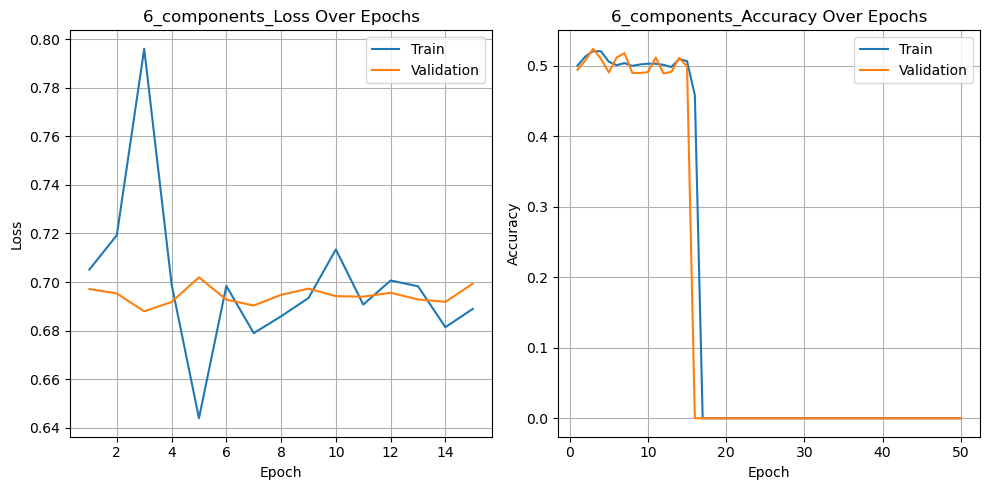

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.005

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 6, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 6}
Epoch 50/50
Training Loss: 0.6650, Training Accuracy: 0.4992
Validation Loss: 0.7072, Validation Accuracy: 0.5117



{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': 0.5080622347949081, 'precision': 0.5082059988681381, 'recall': 0.9994435169727324, 'F1_score': 0.6737947852185331, 'n_components': 6, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 6}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



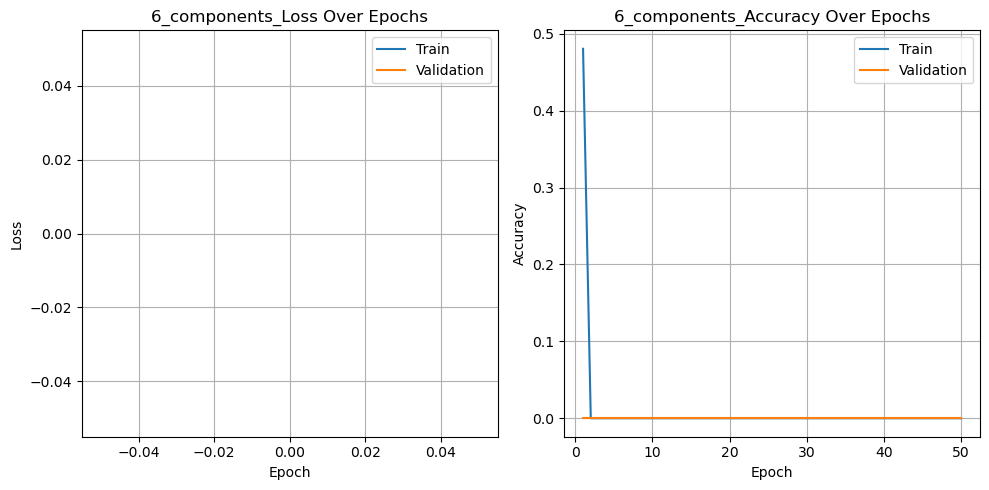

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 6, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 6}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 6, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 6}
Epoch 50/50
Training Loss: 0.6942, Training Accuracy: 0.5053
Validation Loss: 0.6933, Validation Accuracy: 0.4900



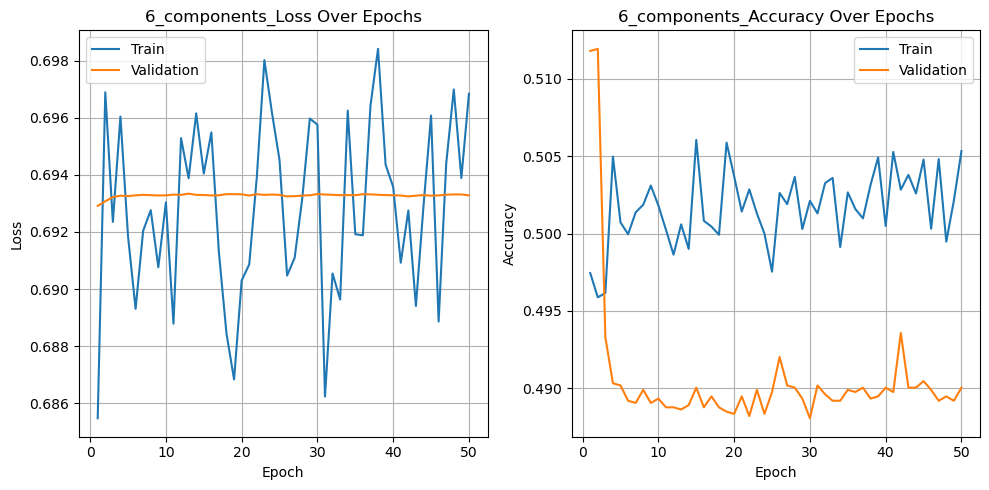

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.4963224893917963, 'precision': 0.5942857142857143, 'recall': 0.028937117417918753, 'F1_score': 0.05518705226850624, 'n_components': 6, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 6}
Epoch 50/50
Training Loss: 0.6933, Training Accuracy: 0.5037
Validation Loss: 0.6932, Validation Accuracy: 0.4910



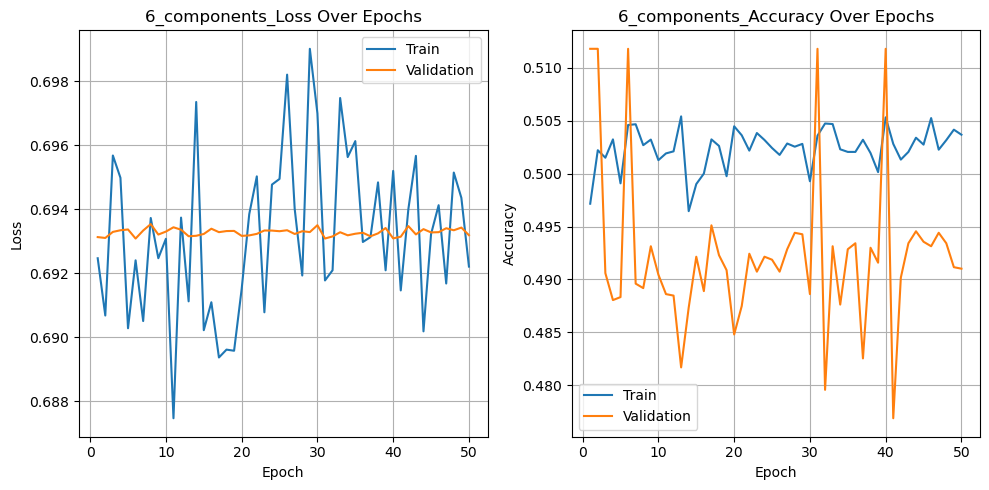

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': 0.5021216407355021, 'precision': 0.5525568181818182, 'recall': 0.1082359488035615, 'F1_score': 0.1810144253140996, 'n_components': 6, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 6}
Epoch 50/50
Training Loss: 0.6915, Training Accuracy: 0.5067
Validation Loss: 0.6930, Validation Accuracy: 0.5118



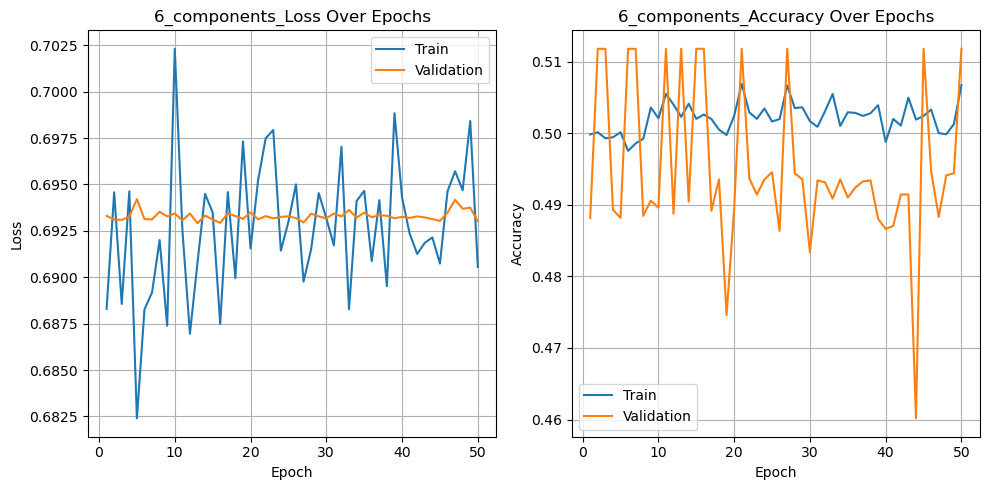

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.5083451202263084, 'precision': 0.5083451202263084, 'recall': 1.0, 'F1_score': 0.6740435108777195, 'n_components': 6, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 6}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



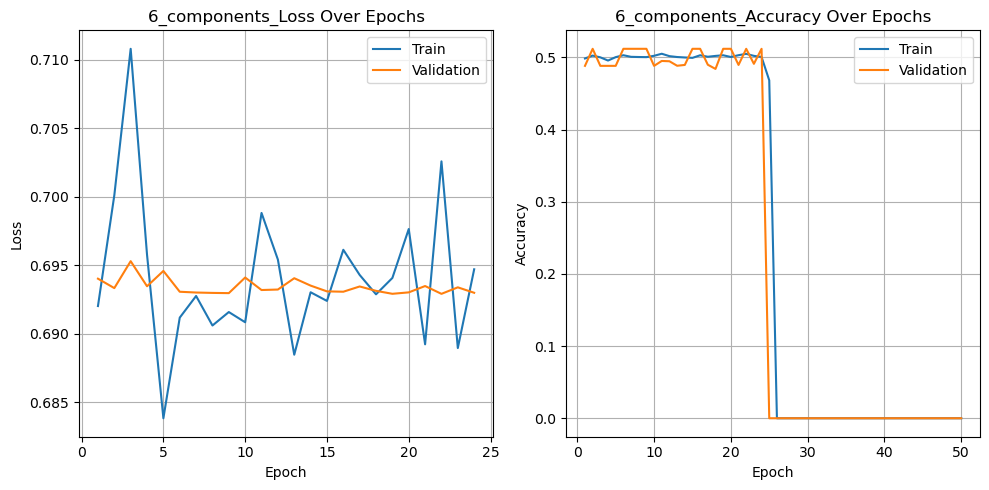

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 6, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 6}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 6, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 7}
Epoch 50/50
Training Loss: 0.7801, Training Accuracy: 0.6398
Validation Loss: 0.6539, Validation Accuracy: 0.6014



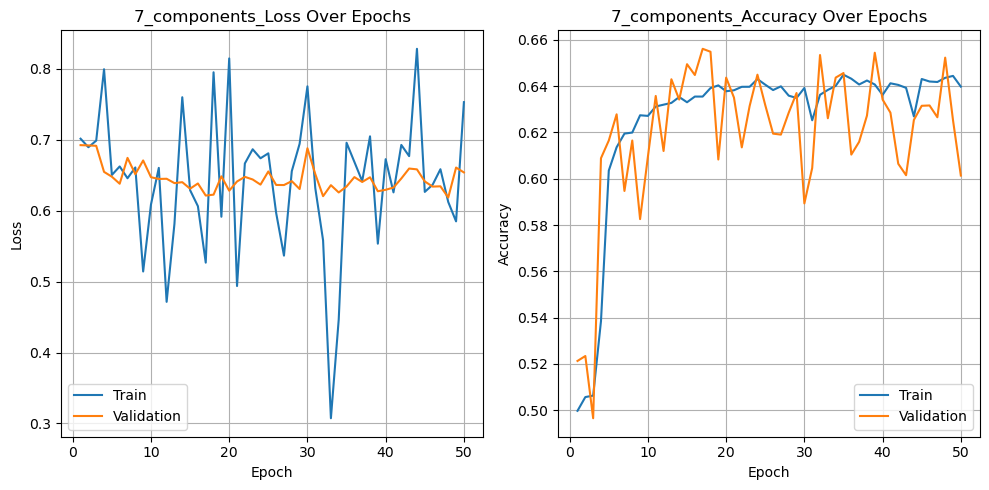

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6125884016973125, 'precision': 0.5670804284985547, 'recall': 0.9452947845804989, 'F1_score': 0.7088957381230737, 'n_components': 7, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 7}
Epoch 50/50
Training Loss: 0.6849, Training Accuracy: 0.5028
Validation Loss: 0.7080, Validation Accuracy: 0.5046



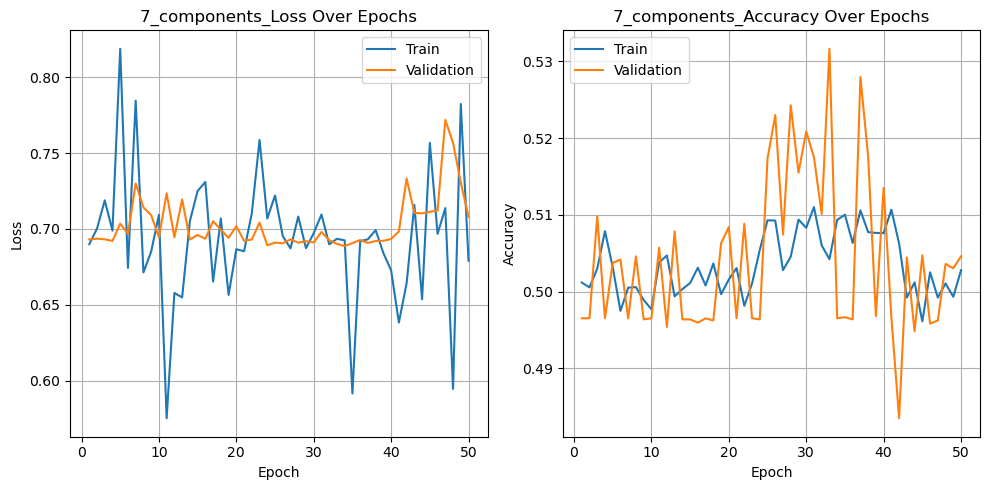

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.5012729844413013, 'precision': 0.5074626865671642, 'recall': 0.01927437641723356, 'F1_score': 0.037138175860185696, 'n_components': 7, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



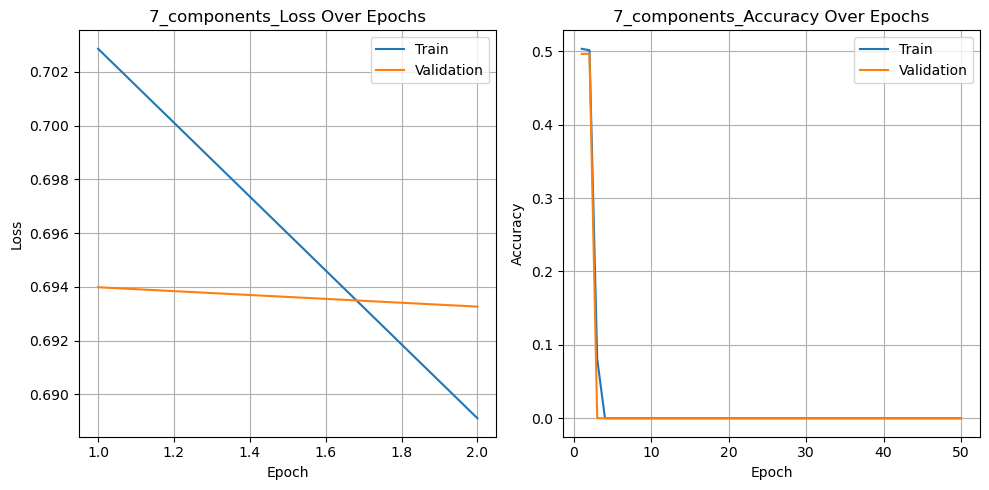

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.01

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



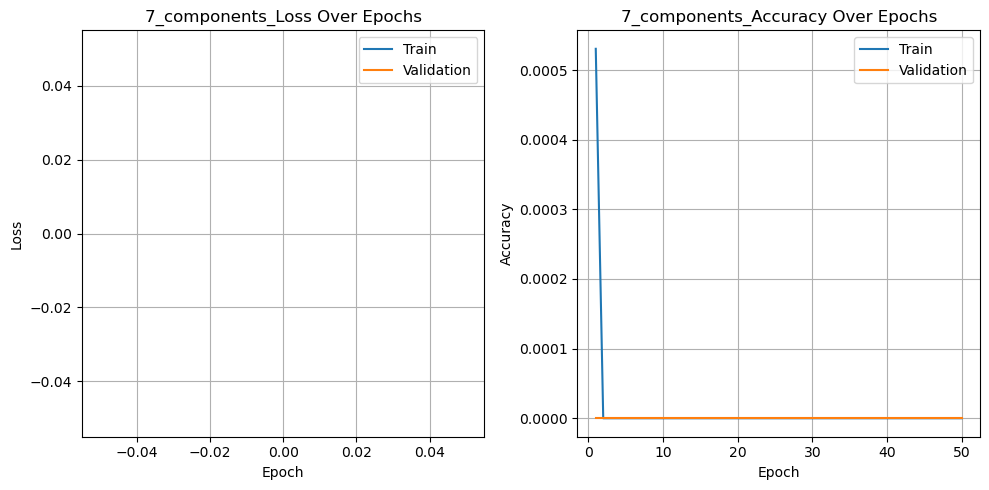

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 7}
Epoch 50/50
Training Loss: 0.7266, Training Accuracy: 0.5002
Validation Loss: 0.6987, Validation Accuracy: 0.4965



{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.499009900990099, 'precision': 0.499009900990099, 'recall': 1.0, 'F1_score': 0.665785997357992, 'n_components': 7, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.005

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 7}
Epoch 50/50
Training Loss: 0.6953, Training Accuracy: 0.4977
Validation Loss: 0.6927, Validation Accuracy: 0.5081



{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.48826025459688827, 'precision': 0.4702774108322325, 'recall': 0.2018140589569161, 'F1_score': 0.282427608092027, 'n_components': 7, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 7}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 7, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 8}
Epoch 50/50
Training Loss: 0.6357, Training Accuracy: 0.6397
Validation Loss: 0.6448, Validation Accuracy: 0.6142



{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6161244695898161, 'precision': 0.5740875912408759, 'recall': 0.892229154849688, 'F1_score': 0.6986453475460804, 'n_components': 8, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 8}
Epoch 50/50
Training Loss: 0.6773, Training Accuracy: 0.5015
Validation Loss: 0.6954, Validation Accuracy: 0.5012



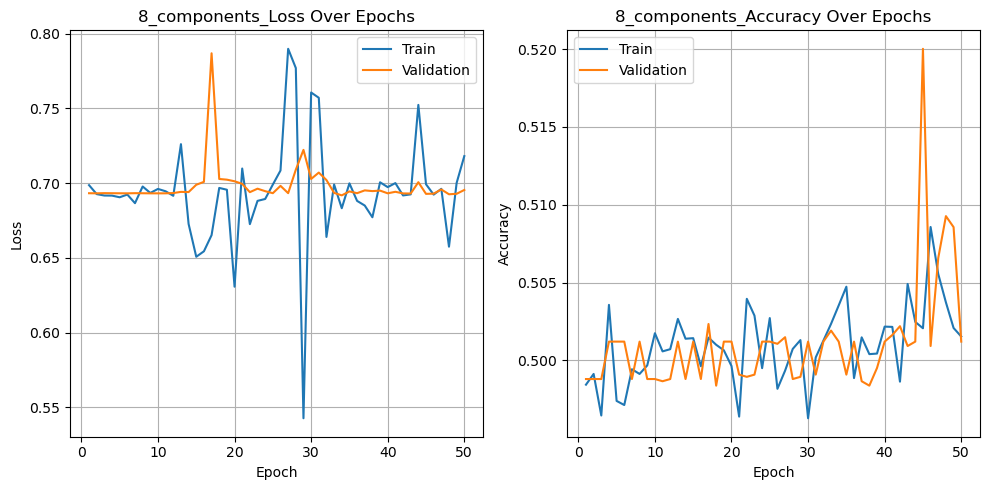

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.4994342291371994, 'precision': 0.4990789287232535, 'recall': 0.9988655700510494, 'F1_score': 0.6655957667958046, 'n_components': 8, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



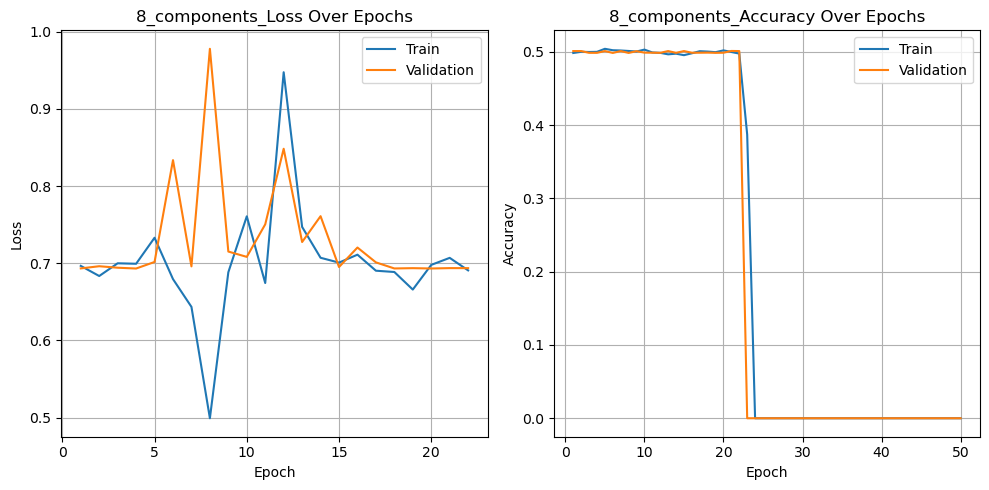

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.01

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



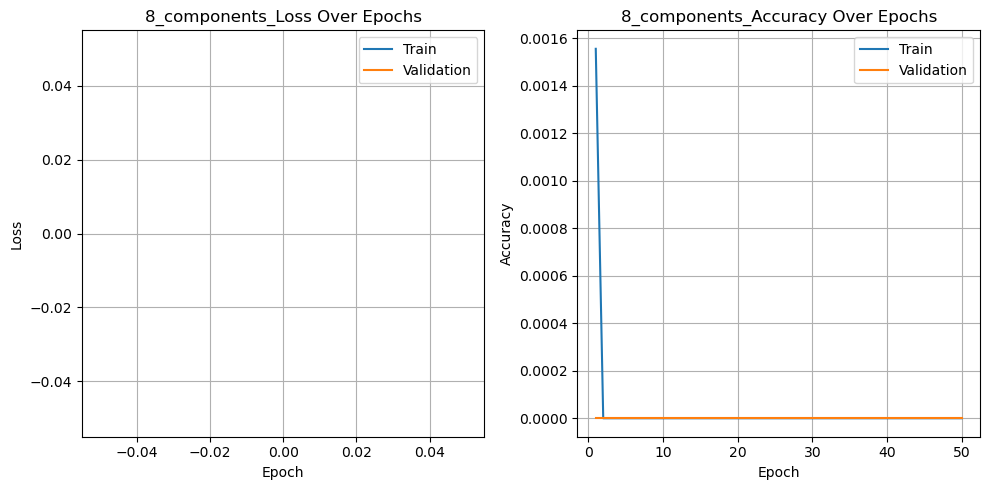

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 8}
Epoch 50/50
Training Loss: 0.6934, Training Accuracy: 0.5018
Validation Loss: 0.6931, Validation Accuracy: 0.5047



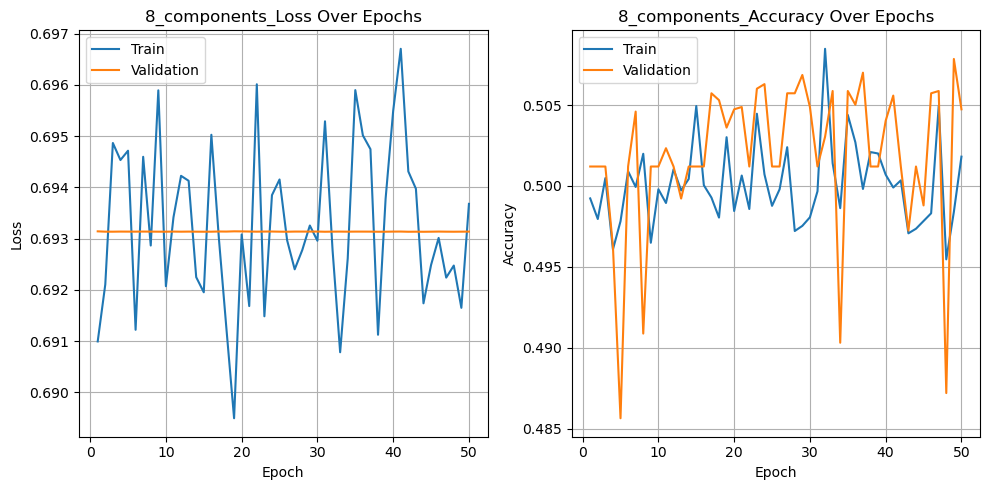

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.5045261669024045, 'precision': 0.5186991869918699, 'recall': 0.09047078842881452, 'F1_score': 0.15406906544312968, 'n_components': 8, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



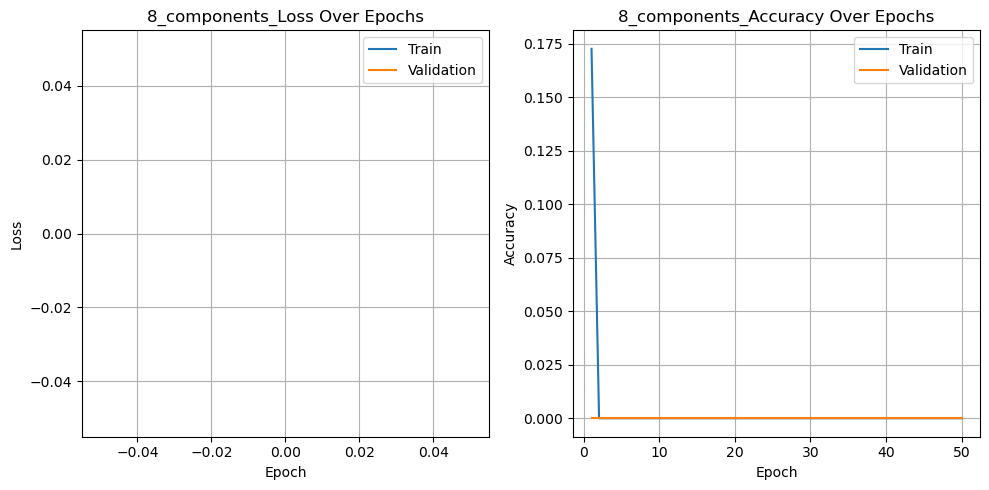

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.005

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 8}
Epoch 50/50
Training Loss: 0.7072, Training Accuracy: 0.5027
Validation Loss: 0.6944, Validation Accuracy: 0.4995



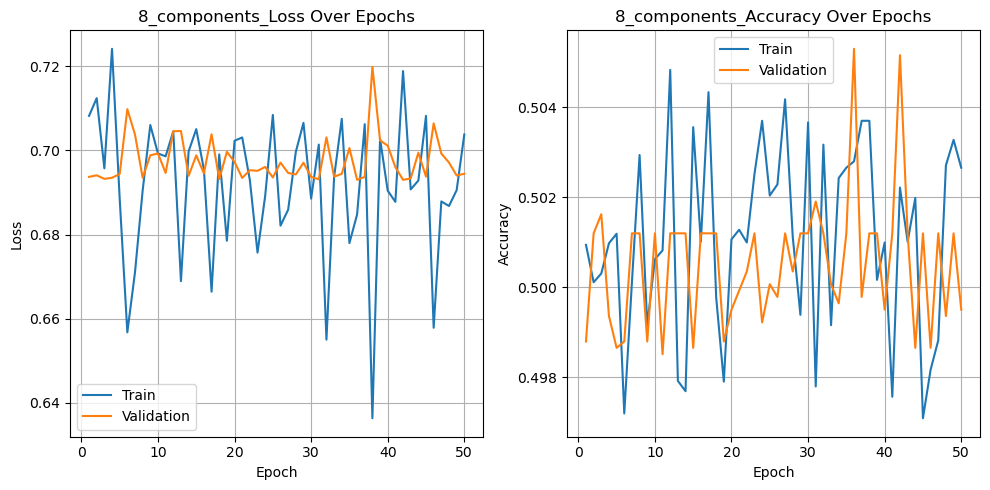

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.503960396039604, 'precision': 0.6938775510204082, 'recall': 0.009642654566080544, 'F1_score': 0.01902097902097902, 'n_components': 8, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



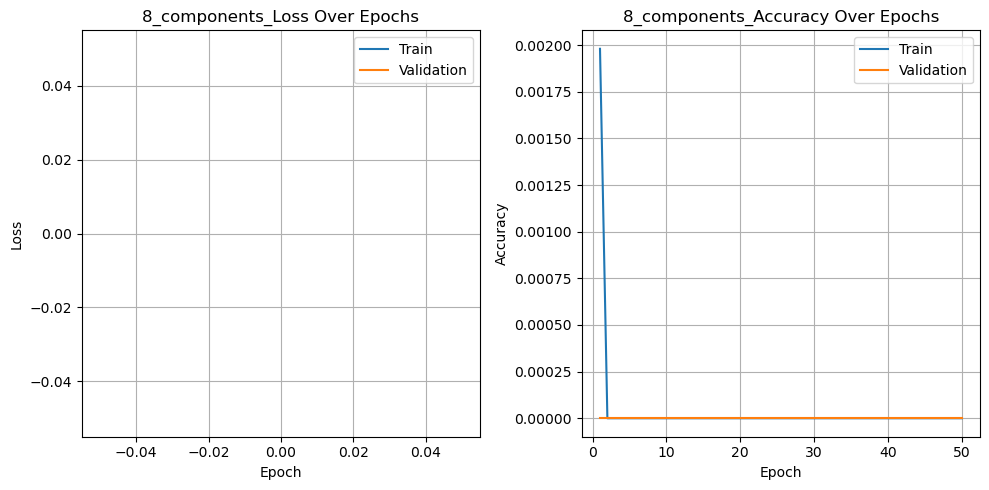

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 8}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



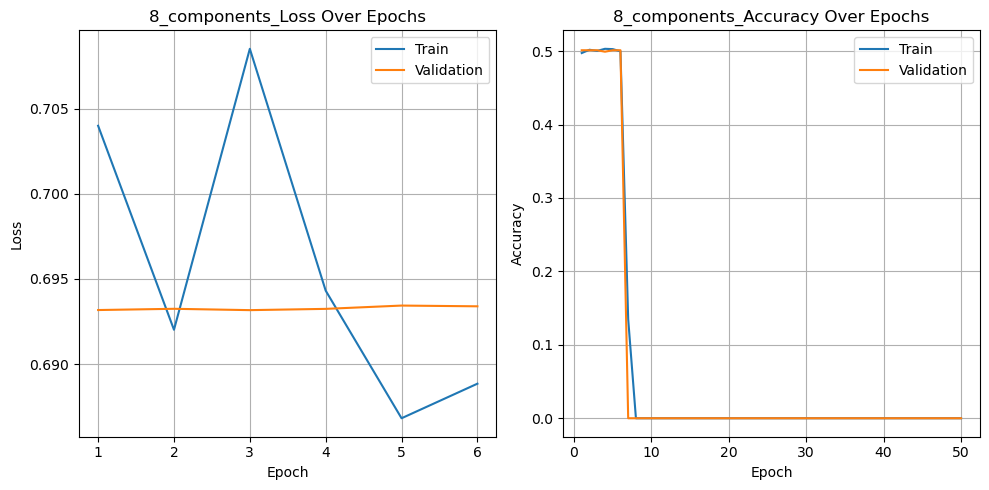

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 8, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 9}
Epoch 50/50
Training Loss: 0.5350, Training Accuracy: 0.6338
Validation Loss: 0.6369, Validation Accuracy: 0.6233



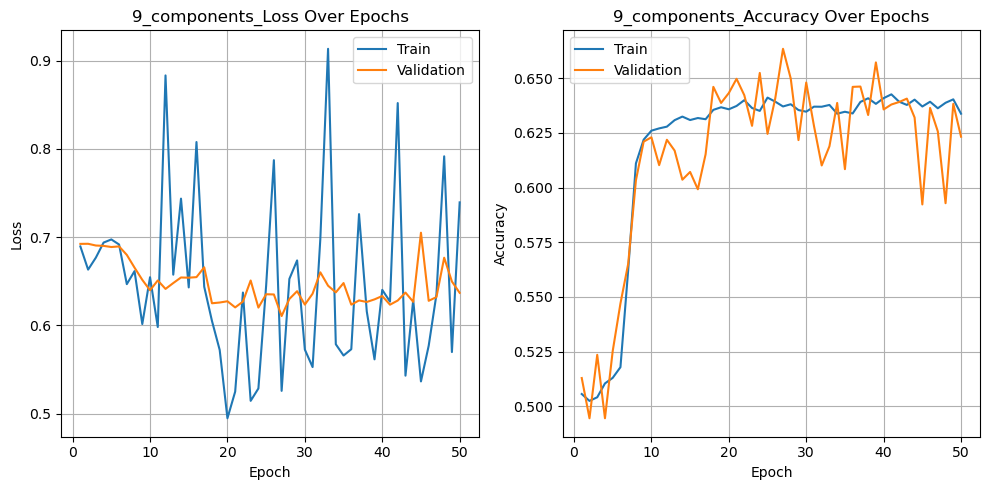

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.6257425742574257, 'precision': 0.5803228285933897, 'recall': 0.8673176335439403, 'F1_score': 0.6953718627676722, 'n_components': 9, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 9}
Epoch 50/50
Training Loss: 0.6945, Training Accuracy: 0.5041
Validation Loss: 0.6957, Validation Accuracy: 0.5103



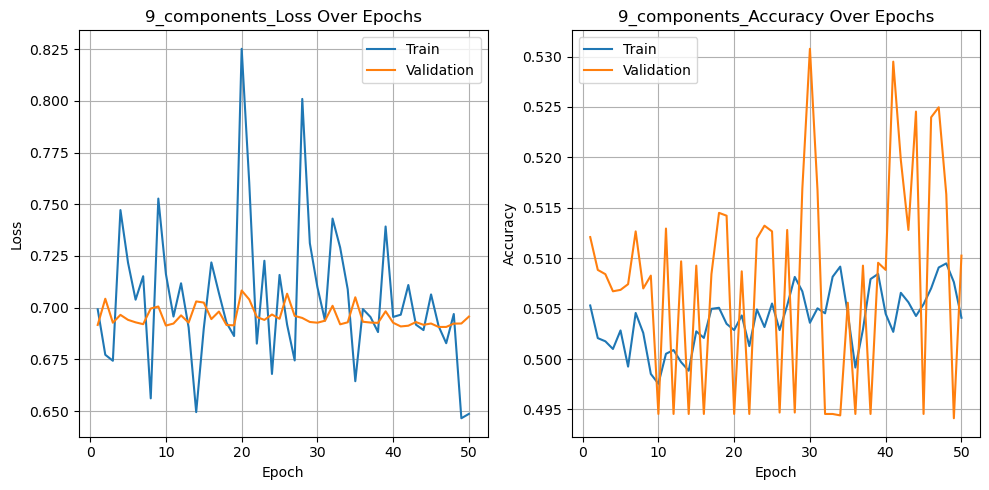

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.5111739745403112, 'precision': 0.75, 'recall': 0.011200459506031017, 'F1_score': 0.022071307300509338, 'n_components': 9, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 9}
Epoch 50/50
Training Loss: 0.7402, Training Accuracy: 0.5009
Validation Loss: 0.7571, Validation Accuracy: 0.5067



{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': 0.5107496463932107, 'precision': 0.8285714285714286, 'recall': 0.00832854681217691, 'F1_score': 0.016491327836224055, 'n_components': 9, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 9}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 9, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 9}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 9, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 9}
Epoch 50/50
Training Loss: 0.6933, Training Accuracy: 0.5008
Validation Loss: 0.6932, Validation Accuracy: 0.4946



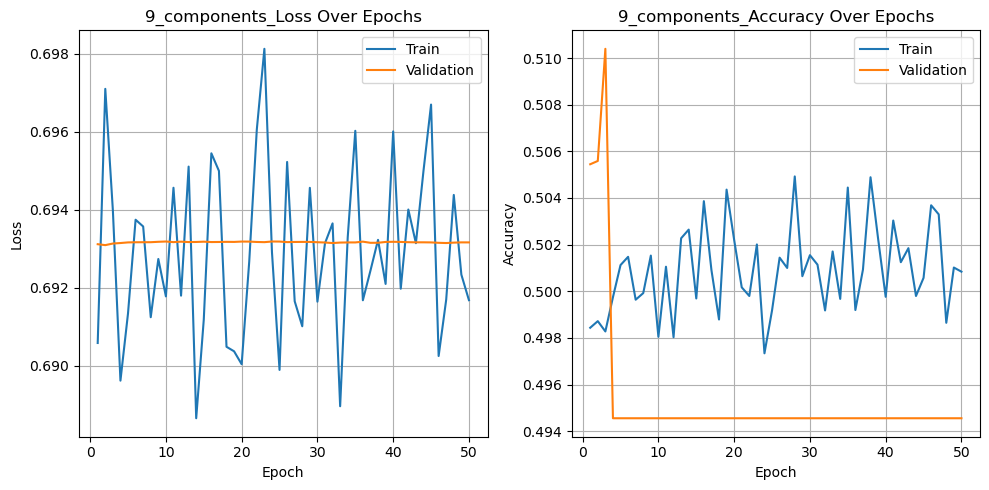

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.4925035360678925, 'precision': 0.4925035360678925, 'recall': 1.0, 'F1_score': 0.6599696739954511, 'n_components': 9, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 9}
Epoch 50/50
Training Loss: 0.6932, Training Accuracy: 0.4989
Validation Loss: 0.6931, Validation Accuracy: 0.4946



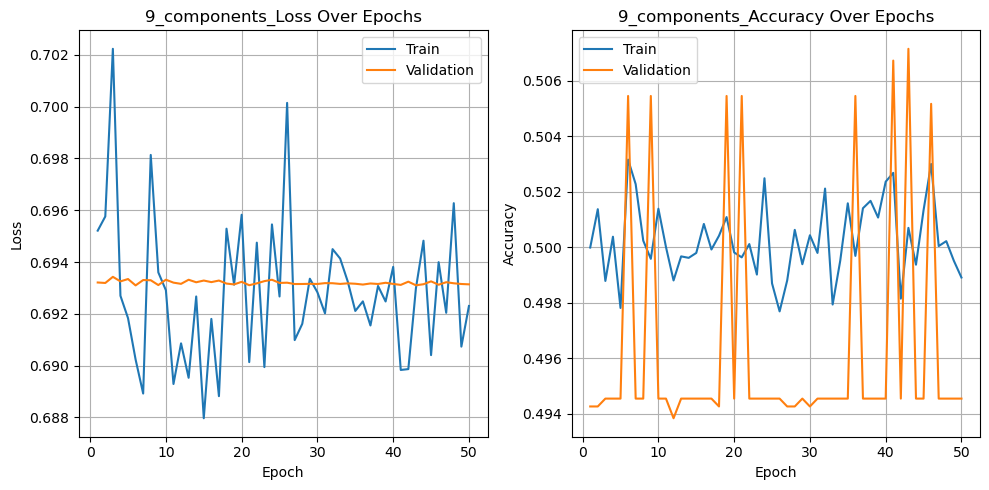

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': 0.4925035360678925, 'precision': 0.4925035360678925, 'recall': 1.0, 'F1_score': 0.6599696739954511, 'n_components': 9, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 9}
Epoch 50/50
Training Loss: 0.6929, Training Accuracy: 0.4990
Validation Loss: 0.6929, Validation Accuracy: 0.5125



{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': 0.5148514851485149, 'precision': 0.5365168539325843, 'recall': 0.10970706490522689, 'F1_score': 0.18216499761564142, 'n_components': 9, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 9}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 9, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 9}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



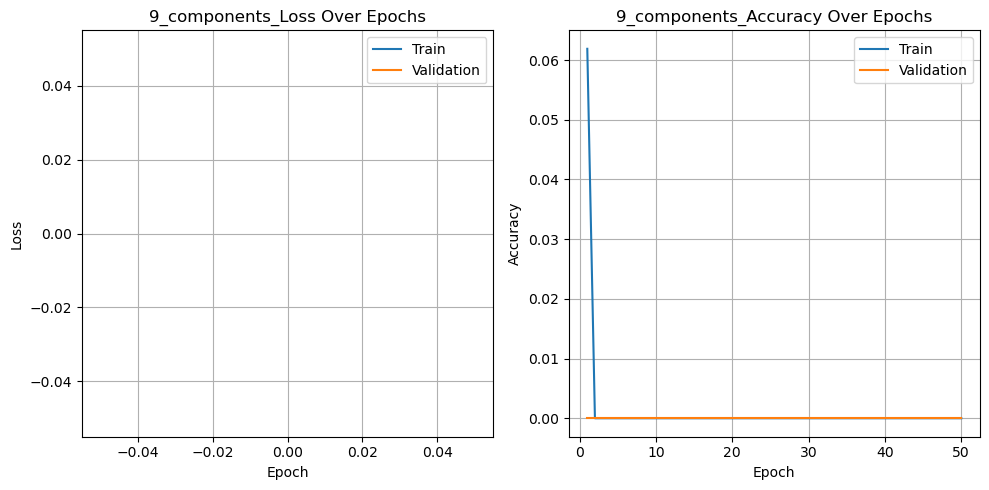

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 9, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.001, 'n_components': 10}
Epoch 50/50
Training Loss: 0.5911, Training Accuracy: 0.6430
Validation Loss: 0.6350, Validation Accuracy: 0.6243



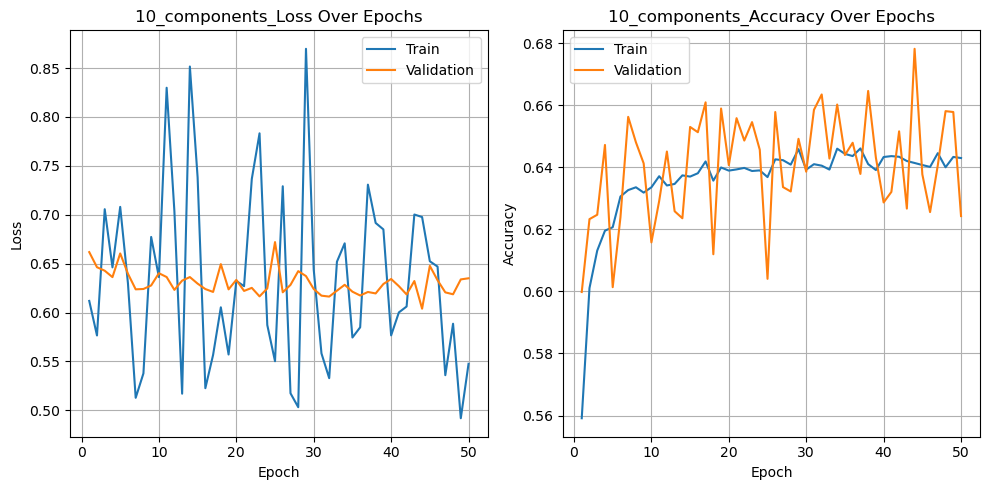

{'optimizer': 'Adam', 'learning_rate': 0.001, 'accuracy': 0.634936350777935, 'precision': 0.5914375346004798, 'recall': 0.8972564389697648, 'F1_score': 0.7129351573796019, 'n_components': 10, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.005, 'n_components': 10}
Epoch 50/50
Training Loss: 0.6967, Training Accuracy: 0.5077
Validation Loss: 0.6926, Validation Accuracy: 0.4899



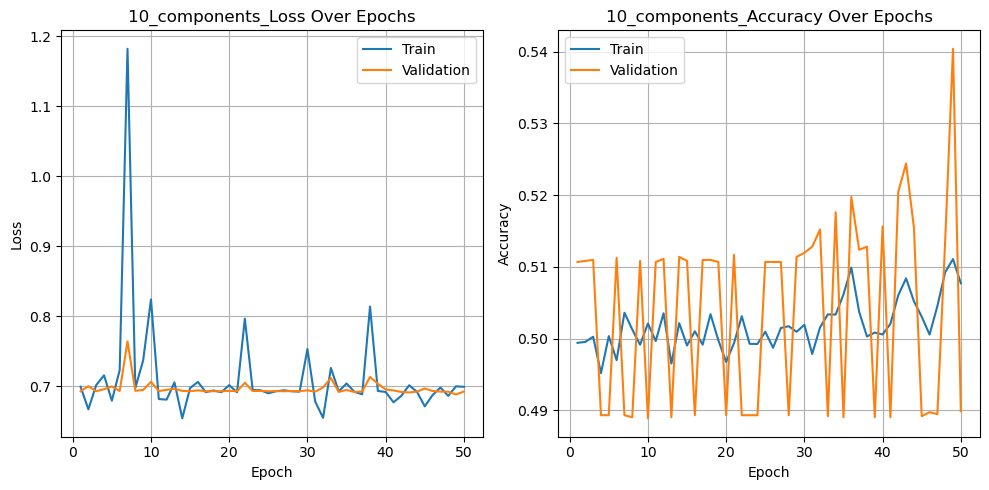

{'optimizer': 'Adam', 'learning_rate': 0.005, 'accuracy': 0.5066478076379066, 'precision': 0.5059591373439274, 'recall': 0.9983202687569989, 'F1_score': 0.6715630885122411, 'n_components': 10, 'failure': False}
{'optimizer': 'Adam', 'learning_rate': 0.01, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



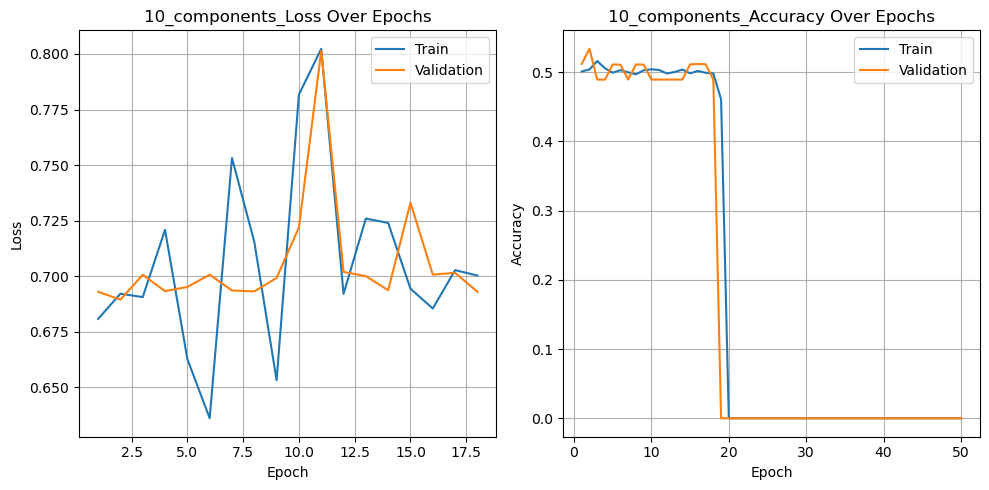

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.01

{'optimizer': 'Adam', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.05, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.05

{'optimizer': 'Adam', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'Adam', 'learning_rate': 0.1, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: Adam
learning_rate: 0.1

{'optimizer': 'Adam', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.001, 'n_components': 10}
Epoch 50/50
Training Loss: 0.6936, Training Accuracy: 0.5002
Validation Loss: 0.6931, Validation Accuracy: 0.4893



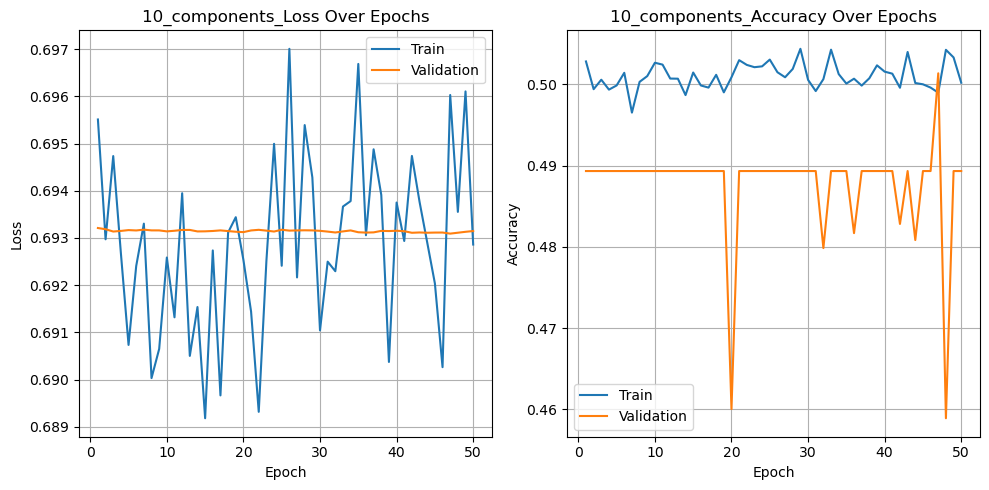

{'optimizer': 'SGD', 'learning_rate': 0.001, 'accuracy': 0.5052333804809053, 'precision': 0.5052333804809053, 'recall': 1.0, 'F1_score': 0.6713023867694042, 'n_components': 10, 'failure': False}
{'optimizer': 'SGD', 'learning_rate': 0.005, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.005

{'optimizer': 'SGD', 'learning_rate': 0.005, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.01, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



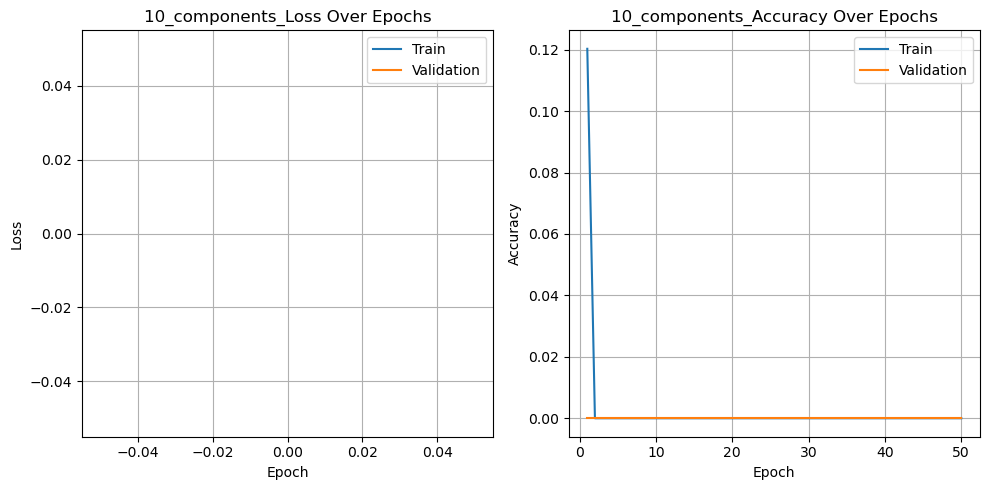

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.01

{'optimizer': 'SGD', 'learning_rate': 0.01, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.05, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



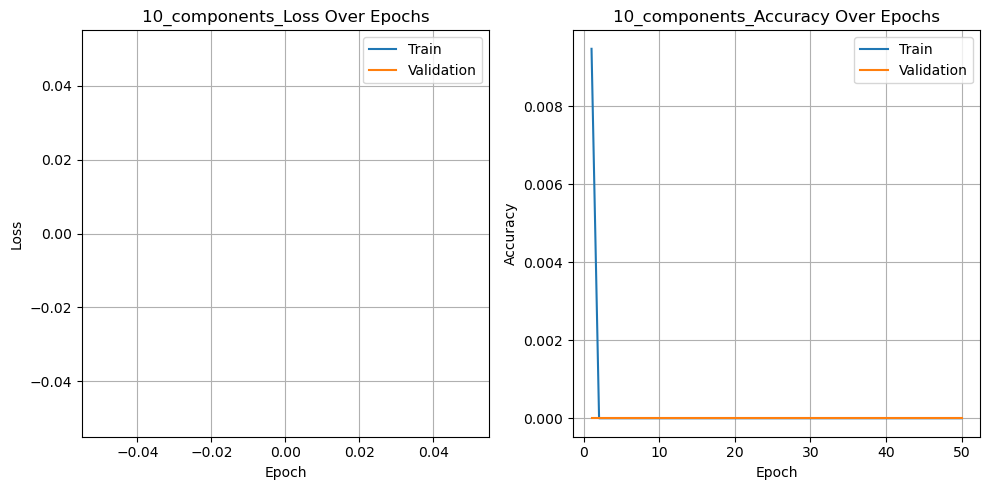

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.05

{'optimizer': 'SGD', 'learning_rate': 0.05, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}
{'optimizer': 'SGD', 'learning_rate': 0.1, 'n_components': 10}
Epoch 50/50
Training Loss: nan, Training Accuracy: 0.0000
Validation Loss: nan, Validation Accuracy: 0.0000



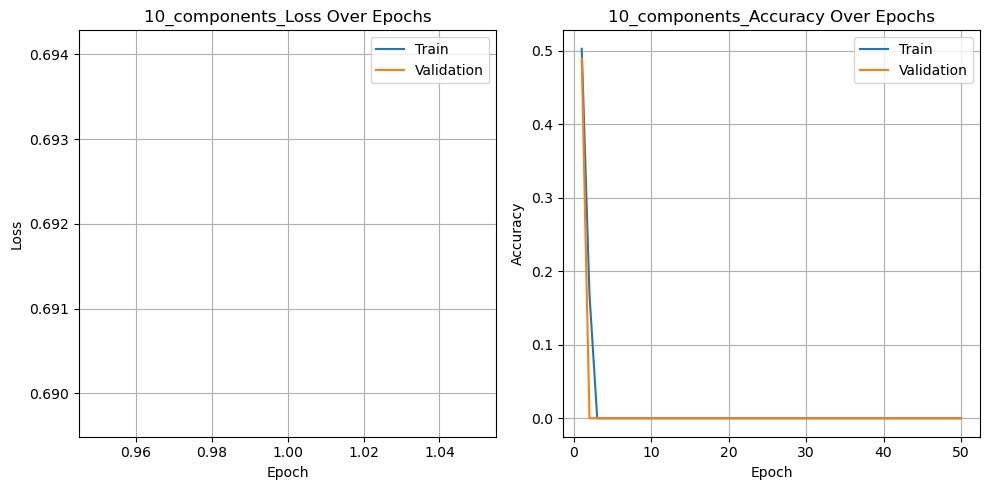

Prediction was NaN.
FAILURE: f1_score
Exception: TypeError, Message: can't multiply sequence by non-int of type 'str'
optimizer: SGD
learning_rate: 0.1

{'optimizer': 'SGD', 'learning_rate': 0.1, 'accuracy': "Couldn't compute", 'precision': "Couldn't compute", 'recall': "Couldn't compute", 'F1_score': 'NA', 'n_components': 10, 'failure': True}


In [32]:

results = []

# Loop over the number of components
for n_components in components_list:
    
    # Perform PCA transformation
    pca = PCA(n_components=n_components, random_state=69)
    

    
    # Balancing classes after PCA
    df_pca = pd.concat([
        df[df['Diabetes_binary'] == 0].sample(class_1),
        df[df['Diabetes_binary'] == 1].sample(class_1)
    ], ignore_index=True)

    df_pca = df_pca.sample(frac=1).reset_index(drop=True)

    X_bal_pca = df_pca.iloc[:,:-1]
    y_bal_pca = df_pca.iloc[:,-1]
    
    X_pca = pca.fit_transform(X_bal_pca)
    
    # Split data into training, testing, and validation sets after PCA
    total_samples_pca = len(X_bal_pca)
    train_size_pca = int(0.8 * total_samples_pca)
    val_size_pca = (total_samples_pca - train_size_pca) // 2
    test_size_pca = total_samples_pca - train_size_pca - val_size_pca

    #print("Shapes of X_bal_pca and y_bal_pca:", X_bal_pca.shape, y_bal_pca.shape)
    
    X_tensor_pca = torch.tensor(X_pca, dtype=torch.float32)  # Using PCA-transformed data
    y_tensor_pca = torch.tensor(y_bal_pca.values, dtype=torch.float32)
    
    #print("Shapes of X_tensor_pca and y_tensor_pca:", X_tensor_pca.shape, y_tensor_pca.shape)


    dataset_pca = TensorDataset(X_tensor_pca, y_tensor_pca)
    train_data_pca, val_data_pca, test_data_pca = random_split(dataset_pca, [train_size_pca, val_size_pca, test_size_pca])

    train_loader_pca = DataLoader(train_data_pca, batch_size=32, shuffle=True)
    val_loader_pca = DataLoader(val_data_pca, batch_size=32)
    test_loader_pca = DataLoader(test_data_pca, batch_size=32)

    # Training the model after PCA
    input_dim_pca = X_pca.shape[1]  # Using PCA-transformed input dimensions
    hidden_dim = 64
    output_dim = 1

    for optimizer_type in [optim.Adam, optim.SGD]:
        for lr in [0.001, 0.005, 0.01, 0.05, 0.1]:
            print({'optimizer': optimizer_type.__name__,
                   'learning_rate': lr,
                   'n_components': n_components})
            model = RBFNN(input_dim_pca, hidden_dim, output_dim)

            criterion = nn.BCEWithLogitsLoss()
            optimizer = optimizer_type(model.parameters(), lr=lr)

            # Training loop
            num_epochs = 50
            train_losses = []
            val_losses = []
            train_accuracies = []
            val_accuracies = []

            for epoch in range(1, num_epochs + 1):
                model.train()
                total_correct_train = 0
                total_samples_train = 0
                for inputs, labels in train_loader_pca:
                    optimizer.zero_grad()
                    outputs, _ = model(inputs)
                    loss = criterion(outputs.squeeze(), labels)
                    loss.backward()
                    optimizer.step()

                    predictions = torch.sigmoid(outputs).round().squeeze()
                    total_correct_train += (predictions == labels).sum().item()
                    total_samples_train += len(labels)

                train_accuracy = total_correct_train / total_samples_train
                train_accuracies.append(train_accuracy)
                train_losses.append(loss.item())

                model.eval()
                total_correct_val = 0
                total_samples_val = 0
                val_loss = 0
                with torch.no_grad():
                    for inputs, labels in val_loader_pca:
                        outputs, _ = model(inputs)
                        loss = criterion(outputs.squeeze(), labels)
                        val_loss += loss.item()

                        predictions = torch.sigmoid(outputs).round().squeeze()
                        total_correct_val += (predictions == labels).sum().item()
                        total_samples_val += len(labels)

                val_accuracy = total_correct_val / total_samples_val
                val_accuracies.append(val_accuracy)
                val_losses.append(val_loss / len(val_loader_pca))

                if epoch%50 == 0:
                    print(f'Epoch {epoch}/{num_epochs}')
                    print(f'Training Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}')
                    print(f'Validation Loss: {val_loss / len(val_loader_pca):.4f}, Validation Accuracy: {val_accuracy:.4f}')
                    print()

            # Plot and save figures
            plt.figure(figsize=(10, 5))

            # Losses
            plt.subplot(1, 2, 1)
            plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
            plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'{n_components}_components_Loss Over Epochs')
            plt.legend()
            plt.grid(True)

            # Accuracies
            plt.subplot(1, 2, 2)
            plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
            plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'{n_components}_components_Accuracy Over Epochs')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()
            
            plt.savefig(f'NNPlots/{n_components}_components_{optimizer_type.__name__}_{lr}_accuracy.png')
            plt.close()

            # Calculate metrics on test set
            with torch.no_grad():
                failure = False
                tp_tn_nan = False
                TP = 0
                TN = 0
                FP = 0
                FN = 0
                total_correct_test = 0
                total_samples_test = 0
                for inputs, labels in test_loader_pca:
                    outputs, _ = model(inputs)
                    predictions = torch.sigmoid(outputs).round().squeeze()
                    total_correct_test += (predictions == labels).sum().item()
                    total_samples_test += len(labels)
                    
                    for i in range(len(labels)):
                        if labels[i].item() == 1 and predictions[i].item() == 1:
                            TP += 1
                        elif labels[i].item() == 1 and predictions[i].item() == 0:
                            FN += 1
                        elif labels[i].item() == 0 and predictions[i].item() == 1:
                            FP += 1
                        elif labels[i].item() == 0 and predictions[i].item() == 0:
                            TN += 1
                        else:
                            failure = True
                            if tp_tn_nan == False:
                                print("Prediction was NaN.")
                                tp_tn_nan = True

                try:
                    precision = TP / (TP + FP) if TP + FP != 0 else "Couldn't compute"
                except Exception as e:
                    precision = "NA"
                    exception_name = type(e).__name__
                    error_message = str(e)
                    message = f"FAILURE: precision\nException: {exception_name}, Message: {error_message}\noptimizer: {optimizer_type.__name__}\nlearning_rate: {lr}\n"
                    print(message)
                    failure = True
                try:
                    recall = TP / (TP + FN) if TP + FN != 0 else "Couldn't compute"
                except Exception as e:
                    recall = "NA"
                    exception_name = type(e).__name__
                    error_message = str(e)
                    message = f"FAILURE: recall\nException: {exception_name}, Message: {error_message}\noptimizer: {optimizer_type.__name__}\nlearning_rate: {lr}\n"
                    print(message)
                    failure = True
                try:
                    f1_score = (2 * precision * recall) / (precision + recall) if precision + recall != 0 else "Couldn't compute"
                except Exception as e:
                    f1_score = "NA"
                    exception_name = type(e).__name__
                    error_message = str(e)
                    message = f"FAILURE: f1_score\nException: {exception_name}, Message: {error_message}\noptimizer: {optimizer_type.__name__}\nlearning_rate: {lr}\n"
                    print(message)
                    failure = True
                try:
                    val_accuracy = (TP + TN) / (TP + FP + TN + FN) if TP + FP + TN + FN != 0 else "Couldn't compute"
                except Exception as e:
                    val_accuracy = "NA"
                    exception_name = type(e).__name__
                    error_message = str(e)
                    message = f"FAILURE: val_accuracy\nException: {exception_name}, Message: {error_message}\noptimizer: {optimizer_type.__name__}\nlearning_rate: {lr}\n"
                    print(message)
                    failure = True

                results.append({'optimizer': optimizer_type.__name__,
                                'learning_rate': lr,
                                'accuracy': val_accuracy,
                                'precision': precision,
                                'recall': recall,
                                'F1_score': f1_score,
                                'n_components': n_components,
                                'failure': failure})
                print({'optimizer': optimizer_type.__name__,
                                'learning_rate': lr,
                                'accuracy': val_accuracy,
                                'precision': precision,
                                'recall': recall,
                                'F1_score': f1_score,
                                'n_components': n_components,
                                'failure': failure})
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv(f'Results/results_scaled_then_PCA.csv', index=False)


In [35]:
results_df[results_df['failure']==False].sort_values(by=['F1_score'],ascending=[False])

optimizer  learning_rate  accuracy precision    recall  F1_score  \
70      Adam          0.001  0.634936  0.591438  0.897256  0.712935   
40      Adam          0.001  0.612588   0.56708  0.945295  0.708896   
30      Adam          0.001  0.622772  0.585786  0.880634  0.703568   
50      Adam          0.001  0.616124  0.574088  0.892229  0.698645   
60      Adam          0.001  0.625743  0.580323  0.867318  0.695372   
10      Adam          0.001  0.641443   0.60431  0.782959  0.682132   
37       SGD          0.010  0.508345  0.508345       1.0  0.674044   
32      Adam          0.010  0.508062  0.508206  0.999444  0.673795   
71      Adam          0.005  0.506648  0.505959   0.99832  0.671563   
75       SGD          0.001  0.505233  0.505233       1.0  0.671302   
6        SGD          0.005       0.5       0.5       1.0  0.666667   
45       SGD          0.001   0.49901   0.49901       1.0  0.665786   
51      Adam          0.005  0.499434  0.499079  0.998866  0.665596   
25       SGD          0.001  0.498161  0.498161       1.0   0.66503   
27       SGD          0.010  0.498161  0.498161       1.0   0.66503   
28       SGD          0.050  0.498161  0.498161       1.0   0.66503   
21      Adam          0.005  0.498727  0.498439  0.997445  0.664711   
65       SGD          0.001  0.492504  0.492504       1.0   0.65997   
66       SGD          0.005  0.492504  0.492504       1.0   0.65997   
16       SGD          0.005  0.491372  0.491372       1.0  0.658953   
15       SGD          0.001  0.491372  0.491372       1.0  0.658953   
20      Adam          0.001  0.649081  0.641172   0.67121  0.655847   
0       Adam          0.001  0.621358   0.61091  0.668458   0.63839   
47       SGD          0.010   0.48826  0.470277  0.201814  0.282428   
7        SGD          0.010  0.493777  0.484308  0.192079  0.275066   
5        SGD          0.001  0.494342  0.485316  0.186987  0.269961   
67       SGD          0.010  0.514851  0.536517  0.109707  0.182165   
36       SGD          0.005  0.502122  0.552557  0.108236  0.181014   
55       SGD          0.001  0.504526  0.518699  0.090471  0.154069   
1       Adam          0.005  0.514286  0.634667  0.067327  0.121739   
11      Adam          0.005  0.522207  0.705128  0.047496  0.088997   
35       SGD          0.001  0.496322  0.594286  0.028937  0.055187   
41      Adam          0.005  0.501273  0.507463  0.019274  0.037138   
2       Adam          0.010   0.50495  0.807018  0.013013  0.025612   
61      Adam          0.005  0.511174      0.75    0.0112  0.022071   
57       SGD          0.010   0.50396  0.693878  0.009643  0.019021   
62      Adam          0.010   0.51075  0.828571  0.008329  0.016491   

    n_components  failure  
70            10    False  
40             7    False  
30             6    False  
50             8    False  
60             9    False  
10             4    False  
37             6    False  
32             6    False  
71            10    False  
75            10    False  
6              3    False  
45             7    False  
51             8    False  
25             5    False  
27             5    False  
28             5    False  
21             5    False  
65             9    False  
66             9    False  
16             4    False  
15             4    False  
20             5    False  
0              3    False  
47             7    False  
7              3    False  
5              3    False  
67             9    False  
36             6    False  
55             8    False  
1              3    False  
11             4    False  
35             6    False  
41             7    False  
2              3    False  
61             9    False  
57             8    False  
62             9    False